# Исследовательский проект для интернет-магазина товаров для дома "Пока все еще тут"

## Материалы: 
* [Презентация] (https://docs.google.com/presentation/d/1Oq5-2LswBorLcVdEkNXQRTUyIl29S3FxD67qSKvTOFg/edit?usp=sharing)

**Описание проекта:** у нас есть следующие данные по транзакциям интернет-магазина товаров для дома: дата заказа, идентификатор покупателя, наименование товара, количество товаров в заказах, цена товара. Наша задача выяснить, как лучше всего настроить рекламные рассылки.

**Цель проекта:** выявить категории покупателей и дать заказчику подробные рекомендации по пользовательским сегментам.

## Декомпозиция проекта

### Предобработка данных:

- выгрузка данных
- проверка корректного наименования столбцов, корректировка при необходимости
- проверка пропущенных значений
- проверка типов данных
- проверка на явные и неявные дубликаты
- добавления столбца "Категория товара"

### Исследовательский анализ данных (EDA):

- посмотреть, какие категории товаров выходят в топ
- построить бохплоты по стоимости товаров по категориям, чтобы определить выбросы
- посмотреть на сезонность покупок
- определить количество повторных покупок
- выяснить, какое количество товаров чаще всего встречается в заказах

### Выявление сегментов пользователей:

Для сегментирования возьмем такие данные как давность последней покупки, частота покупок и сумма покупок. На основе этих данных выявим основные типы покупателей.   



### Проверка гипотез:

**Н0:** Уходящие клиенты и обычные клиенты не отличаются по среднему чеку.  
**Н1:** Уходящие клиенты и обычные отличаются по среднему чеку.

**Н0:** Обычные клиенты и потенциальные клиенты не отличаются по сумме выручки.  
**Н1:** Обычные клиенты и потенциальные клиенты отличаются по сумме выручки.

### Выводы и рекомендации:

Сделать выводы на основе полученных данных, дать рекомендации по каждому профилю пользователей. Определить, на что стоит тратить рекламный бюджет и на чем лучше сэкономить. 

### Предобработка данных:

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats
import itertools

Посмотрим на данный датасет.

In [2]:
# загрузим данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')
display(data.head(10))

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


У нас есть данные по датам заказа, индивидуальному id покупателя, номер заказа, наименование продукта, количество покупок в одном заказе и стоимость. Преобразование названий столбцов не требуется. Посмотрим на формат столбцов.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Надо подредактировать форматы даты.

In [4]:
# переведем столбец в формат datetime и оставляем только дату и время до секунд
data['date'] = pd.to_datetime(data['date'].astype(str), format='%Y%m%d%H')
data['date']

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
7469   2020-01-30 21:00:00
7470   2020-01-30 22:00:00
7471   2020-01-31 02:00:00
7472   2020-01-31 12:00:00
7473   2020-01-31 15:00:00
Name: date, Length: 7474, dtype: datetime64[ns]

Проверим, есть ли пропущенные значения в данных.

In [5]:
# проверим наличие пропусков
data.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

В датасете пропуски отсутствуют. Сделаем проверку на явные и неявные дубликаты.

In [6]:
# проверка явных дубликатов
data.duplicated().sum()

0

In [7]:
# посмотрим неявные дубликаты
data[data.duplicated(subset = ['customer_id','order_id','product', 'price', ], keep=False)]

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


Их достаточно много, однако придется удалить, чтобы построить более реалистичную картину продаж интеренет-магазина.

In [8]:
data = data.drop_duplicates(subset = ['customer_id','order_id','product', 'price', ], keep = 'first')
display(data)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


Проверим данные на наличие заказов совершенных более чем одним покупателем.

In [9]:
# найдем заказы, оформленные более чем одним покупателем
multiple_customers_orders = data.groupby('order_id')['customer_id'].nunique()

# выделим только некорректные заказы
invalid_orders = multiple_customers_orders[multiple_customers_orders > 1].index
invalid_orders

Index([14872, 68785, 69283, 69310, 69345, 69410, 69485, 69531, 69833, 70114,
       70542, 70631, 70726, 70808, 70903, 70946, 71054, 71226, 71461, 71480,
       71542, 71571, 71648, 71663, 72188, 72778, 72790, 72845, 72950],
      dtype='int64', name='order_id')

In [10]:
# выберем по одной строке из каждого некорректного заказа
rows_to_drop = data[data['order_id'].isin(invalid_orders)].drop_duplicates('order_id')
rows_to_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 512 to 6601
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         29 non-null     datetime64[ns]
 1   customer_id  29 non-null     object        
 2   order_id     29 non-null     int64         
 3   product      29 non-null     object        
 4   quantity     29 non-null     int64         
 5   price        29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.6+ KB


Видим, что 29 одинаковых заказов были сделаны разными покупателями. Они портят картину продаж, удалим повторные заказы.

In [11]:
# удалим эти строки
data = data.drop(rows_to_drop.index)
print(f"Удалено {len(rows_to_drop)} строк с некорректными заказами.")
data

Удалено 29 строк с некорректными заказами.


,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


Далее нам необходимо создать столбец с категорией товара. В дальнейшем он пригодится нам в работе. Для этого рассортируем все категории продуктов по этому столбцу. 

In [12]:
# посмотрим на уникальные значения товаров 
data['product'].unique()[0:200]

array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', 'Хризолидокарпус Лутесценс d-9 см',
       'Циперус Зумула d-12 см h-25 см', 'Шеффлера Лузеана d-9 см',
       'Юкка нитчатая d-12 см h-25-35 см',
       'Настенная сушилка для белья Gimi Brio Super 100',
       'Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056',
       'Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379',
       'Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331',
       'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м',
       'Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42',
       'Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027',
       'Корзина мягкая пластиковая 17 л, М-пластика, M2880',
       'Мини-сковорода Marmiton "Сердце" с антипригарным покрытием 12 см, LG17085',


In [13]:
# проверим следующие значения
data['product'].unique()[200:400]

array(['Сушилка для белья потолочно-настенная Gimi Lift 240, 5031',
       'Tepмокружка AVEX Recharge 500 мл голубой AVEX0681',
       'Чехол для гладильной доски Zalger 520135 140х50 см хлопок поролон для доски 135х45 см',
       'Щетка для смахивания пыли 60 см разноцветная, Burstenmann, 0528/0000',
       'Мирт d-20 см h-25 см',
       'Цветущее комнатное растение Хризантема диаметр горшка 18 см',
       'Сушилка для белья потолочная Лиана 1,7 м 1703006',
       'Чайник эмалированный METALLONI со свистком и керамической ручкой "Французский шарм" 2,5 л EM-250X1/28',
       'Чехол для гладильной доски Zalger 520138 140х50 см металлизированный с поролоном для доски 135х45 см',
       'Штора для ванной комнаты Diamante 240х200 см бежевая, Bacchetta, 4800',
       'Стремянки Colombo Leonardo 3 ступени G300A03W черая 3649',
       'Таз пластмассовый со стиральной доской (Иж), 1404021',
       'Щетка для посуды *Мила* SV3182 1807009',
       'Щетка-утюжок с ручкой Миди, Standart, York, G11

In [14]:
data['product'].unique()[400:600]

array(['Гладильная доска НИКА SOPHY КОРИЦА HSK 123х46 см',
       'Коврик противоскользящий пузырьки 70х38 см прозрачный 5523',
       'Чехол для гладильной доски универсальный с поролоном 2, 1290 х 500, ЧП2, НИКА',
       'Сумка-тележка хозяйственная GIMI Argo голубая',
       'Муляж Ананас светло-коричневый 10 см полиуретан',
       'Муляж Баклажан 18 см', 'Муляж Банан желтый 21 см полиуретан',
       'Муляж Груша мини 2 шт желтая 4 см',
       'Муляж Манго оранжевый 13 см полиуретан', 'Муляж Морковь 16 см',
       'Муляж Персик 9 см полиуретан', 'Муляж Тыквы d-20 см',
       'Муляж Черешня 10 штук d 2,5 см, цвет в ассортименте',
       'Сумка-тележка хозяйственная Rolser BAB010 negro JOY-1800 черная',
       'Чехол для гладильной доски Zalger 520133 120х40 см хлопок поролон для доски 115х35 см',
       'Сумка-тележка 2-х колесная Gimi Galaxy черная',
       'Сковорода Scovo Эксперт Дем СЭ-040 для блинов алюминиевая с антипригарным покрытием, 25 см, 1503020',
       'Герань домашняя 

In [15]:
data['product'].unique()[600:800]

array(['Сменный блок для ролика 2 шт (R160071), Rozenbal, R510100',
       'Таз пластмассовый 4,5 л пищевой "Космея" (Ангора) 1404092',
       'Герань домашняя (пеларгония зональная) цветущая D12, H25-30, ярко розовая, полумахровая',
       'Пеларгония d-13 см с топпером на День учителя в подарочной упаковке',
       'Роза патио белая d-12 см h-30', 'Роза патио красная d-12 см h-30',
       'Роза патио оранжевая d-12 см h-30',
       'Стремянка 5 ступенчатая Hailo 8150-507 L50 алюминиевая с крючком на красной ручке',
       'Набор бокалов ИМПЕРАТОР 3 шт 170 мл 06707 E5181 Luminarc Франция',
       'Набор стаканов для виски 300 мл 6 шт серия Карат 52885В',
       'Термометр на окно уличный на липучках Т-5 h-20 см 1210035',
       'Термометр уличный оконный ТБ 202 h-20 см 1210036',
       'Ящик почтовый металлический с ушками для навесного замка Домик 1205251',
       'Сушилка для белья напольная Gimi Mito, алюминий',
       'Гладильная доска НИКА ВЕРОНА 1 чехол РЕТРО 122х42 см ДВ1р',
  

In [16]:
data['product'].unique()[800:1000]

array(['Коврик ворсовый ПВХ придверный Multy 60х180 см коричневый',
       'Чайный набор СЕЛЬМА 220мл, G9434, Luminarc, Франция',
       'Вешалка напольная TWIST складная 45*35 VRTW-1 светлая Степанов',
       'Скатерть Towa Co Ажурная Presea прямоуголная 120х150 см сепия 5514',
       'Вантуз черный с пластиковой ручкой малый Д-100 (МАГ), 1206002',
       'Вешалка с закругленными плечиками перекладиной и крючками с противоскользящим покрытием Valiant 213R11 черный',
       'Термокружка Alpenkok AK-04010A синий 400 мл',
       'Чехол для гладильной доски универсальный с поролоном антипригарный, ЧПА, НИКА',
       'Сушилка для белья потолочная ЛИАНА ЛЮКС 180 см ЛЛП-180',
       'Плед флисовый 200х150 см WELLNESS WPLNY152-Зима_4 100 % полиэстер',
       'Гладильная доска НИКА LORETA GOLF HL 123х46 см',
       'Фоторамка Alparaisa на 7 фотографий бронзовая 43х42,5 см С31-017',
       'Этажерка 2 для обуви узкая 4 полки, медный, ЭТ2, НИКА',
       'Тарелка десертная БАМБУК 20 см J0276 Lumi

In [17]:
data['product'].unique()[1000:1100]

array(['Гладильная доска НИКА ЛИНА 1 112х34,5 см ДЛ1',
       'Гладильная доска Dogrular Эко Инжи 110х33 см 224414',
       'Средство для быстрого удаления жировых загрязнений DECS Антижир 500 мл Россия 4660015923259',
       'Совок и щетка на стальных длинных рукоятках 120 см, Rozenbal, R500028',
       'Контейнер для мусора ДОМИНИК CURVER 25 л серебристый 05322-877',
       'Тарелка десертная Luminarc ДИВАЛИ 19 см D7358',
       'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см 10 м',
       'Хлебница деревянная (Бук) КБ-028, 35х28х19 см 1524002',
       'Сумка-тележка хозяйственная GIMI KANGOO THERMO powder коричневая',
       'Искусственный цветок Мимоза пластиковая желтая',
       'Гладильная доска Sarayli Grown Lux 45х125 см',
       'Гладильная доска Dogrular Сити 110х33 см 223712',
       'Пеларгония розебудная Margaretha укорененный черенок',
       'Тарелка суповая СТОУНМАНИЯ КАПУЧИНО 20 см J2132 Luminarc',
       'Антуриум андрианум Пикассо голубой d-15 см',
      

In [18]:
data['product'].unique()[1100:1200]

array(['Штанга для ванной Г-образная, угловая 80Х170 см, хром',
       'Сушилка для белья Zalger Bright Short 510-520 10 м',
       'Рассада зелени для кухни Мята Эппл Минт диам. 9 см',
       'Рассада зелени для кухни Розмарин Блю Лагун диам. 9 см',
       'Рассада зелени для кухни Тимьян Вульгарис Компактус диам. 9 см',
       'Рассада зелени для кухни Тимьян-чабрец розовый объем 0,5 л',
       'Рассада пряной травы Кофе Арабика в горшке d-9 см',
       'Чайный набор Luminarc ОТАНТИК СИЛЬВЕР 220 мл H8388',
       'Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90',
       'Сумка-тележка хозяйственная Rolser JET029 azul-lois JOY синяя',
       'Гладильная доска Hausmann Classic MONO 120x38 cм HM-2122',
       'Увлажняющая маска Brown Rice Moisture 330 мл Корея 599928',
       'Сушилка для белья Gimi Duplo',
       'Искусственный цветок Лилейник пластиковый светло-лиловый',
       'Корзина для глаженного белья NATURAL STYLE пластиковая темно-серая 45 л 38х59

In [19]:
data['product'].unique()[1200:1300]

array(['Насадка для ведра Basic Wet & Dry Mop пластиковая зеленая, Leifheit, 55237',
       'Искусственная композиция из цветов пластиковая Ромашка мини розовая',
       'Сумка-тележка хозяйственная Rolser Jet Claudia Joy серая, JET006 marengo JOY',
       'Штангенциркуль 150 мм пластмассовый, точность 0,1 мм 3015515, 0910007',
       'Скатерть 350х150 см WELLNESS MT355-Джулия*16 36% полиэстер 64% хлопок',
       'Роза Кордана белая d-10 см h-20',
       'Жестяная банка Горошек Ц099h145v110-01321',
       'Коврик влаговпитывающий ребристый 60х90 см Стандарт черный 5881',
       'Сумка-тележка хозяйственная Rolser Paris, бордовая, PEP001 bassi JOY',
       'Мыло-скраб с мочалкой люфой Мандала около 100 г',
       'Сумка-тележка хозяйственная Rolser MOUNTAIN черная, MOU076 negro CONVERT RG',
       'Сумка-тележка хозяйственная Andersen Scala Shopper, Elba, бирюзовая 112-051-90',
       'Тарелка обеденная Luminarc ПУЭБЛО корал 69883',
       'Коврик интерьерный для кухни La Bruschetta из 

In [20]:
data['product'].unique()[1300:1400]

array(['Тарелка обеденная АЛЬТО САПФИР 26 см J1749 Luminarc',
       'Гладильная доска НИКА 11 тефлон 122х40 см НТ11',
       'Газания рассада однолетних цветов в кассете по 10 шт',
       'Овсянница сизая серый объем 1 л',
       'Концентрат для мытья посуды Mama Ultimate Зеленый чай 1000 мл РоссияКорея 049320',
       'Форма для выпечки ALPENKOK AK-6038S для кекса Спираль розовый d=25 см; h=9 см',
       'Набор вешалок универсальных Attribute NEO BLUE 42 см 5 шт AHS725',
       'Искусственный цветок Тюльпан пластиковый открытый ярко-красный',
       'Швабра для мытья окон Leifheit Comfort с телескоп. Ручкой, 51010',
       'Тортница CURVER 00416-286-00',
       'Георгина Черная красавица 5 шт 4650091480579',
       'Календула Бронзовая красавица 10 шт 4650091480746',
       'Космея Лимонад 10 шт 4650091480500',
       'Космея Попсокс белая 10 шт 4650091480562',
       'Космея Попсокс розовая 10 шт 4650091480555',
       'Космея Снежный клик 0,1 г 4660010770414',
       'Смолевка Звез

In [21]:
data['product'].unique()[1400:1500]

array(['Ложка кухонная Attribute IVORY AGI030',
       'Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90',
       'Коврик придверный MOHAWK Mansonry Foliage Листопад 58,5х89 см 5412',
       'Коврик придверный хлопковый 60х250 см мультиколор, Helex, С06',
       'Швабра хозяйственная для пола PICOBELLO XL strong 33 см зеленая, Leifheit, 57030',
       'Рассада зелени для кухни Мелисса лимонная зеленый объем 0,75 л',
       'Рассада пряной травы Эвкалипт Сильвердроп в горшке d-9 см',
       'Ткань универсальная из микрофибры Micro Magic серая, Leifheit, 40020',
       'Рассада Капусты белокачанная поздняя Лидер, кассета по 10шт',
       'Рассада перца болгарского сладкого Красное чудо, горшок диам 12',
       'Рассада томата (помидор) Джессика № 50 сорт индетерминантный раннеспелый красный',
       'Рассада томата (помидор) Сладкий Касади №76 сорт индетерминантный среднеспелый оранжевый',
       'Рассада томата (помидор) сорт Аделина, горшок диам 12',
       'Р

Так как товаров у нас много, будет сортировать по частям. Начнем пистать функцию сортировку, добавляя в нее значения новых столбцов.

In [22]:
# напишем функцию сортировки
def product_type_filtered(product, products):
    if any (word in product for word in ('растение', 'Комнатное растение', 'Радермахера', 'Циперус', 'Юкка', 'Рассада', 
                                         'Герань', 'Пеларгония', 'Суккулент', 'Эвкалипт', 'Адиантум',
                                         'Кампанула', 'Калатея','Нолина','Хлорофитум','Глоксиния',
                                         'Гортензия', 'Мирт', 'Хризантема', 'Иссоп', 'Аспарагус',
                                        'Афеляндра', 'Антуриум', 'Молодило', 'Гербера', 'Мелисса', 'Роза',
                                        'Бегония', 'Многолетнее растение', 'Розмарин', 'Альбука', 
                                        'Крассула', 'Артемизия', 'Фиалка', 'Лаванда', 'Примула', 'Дендробиум',
                                        'Калоцефалус', 'Каллуна', 'Капсикум', 'Мимоза', 'Соланум', 'Бархатцы',
                                        'Космея', 'Морковь', 'Настурция', 'Огурец', 'Петуния', 'Алиссум',
                                        'Гвоздика', 'Годеция', 'Календула', 'Капуста', 'Кореопсис', 'Лапчатка',
                                        'Львиный зев', 'Флокс', 'Цинерария', 'Эшшольция', 'Диффенбахия',
                                        'Бальзамин', 'Фаленопсис', 'Подсолнечник', 'Пуансетия', 'Гиностемма',
                                        'Ель', 'Кипарисовик', 'Аптения', 'Пуансеттия', 'Скиммия', 'искуственных цветов',
                                        'лиана', 'Кодонанта', 'Цикламен', 'Гимнокалициум', 'Эхинокактус', 
                                        'Эхеверия', 'Крокусы', 'Спатифиллум', 'Гипсофила', 'Тюльпаны', 'Калибрахоа',
                                        'Эпипремнум', 'Гиацинты', 'Аквилегия', 'Базилик', 'Горох', 'Земляника',
                                         'Незабудка', 'Седум', 'Тимьян', 'Томат', 'Укроп', 'Нефролепис', 'Калла', 
                                         'Декабрист', 'Тюльпан', 'Штангенциркуль', 'Нарцисс', 'Мята', 'Азалия',
                                         'Гиацинт', 'Вербена', 'Чабер', 'Бакопа', 'Ранункулус', 'Георгина', 
                                        'Смолевка', 'Цинния', 'Лавр', 'Виола', 'Колокольчик', 'Котовник', 'рассада',
                                        'Эхинацея', 'Лилейник', 'Папоротник', 'Платикодон', 'Энотера', 'Цитрофортунелла',
                                        'Пеперомия', 'Дыня', 'Синнингия', 'Гардения', 'помидор', 'Лобелия',
                                        'Хризолидокарпус', 'Шеффлера', 'Кориандр', 'Сантолина', 'Душица',
                                        'Фиттония', 'Алоэ', 'Шеффлера', 'Фикус', 'Вербейник', 'Ясколка', 'Фуксия',
                                        'Физостегия', 'Пиретрум', 'Арбуз', 'Петрушка', 'Каланхое', 'виноград',
                                        'Мускари', 'Муррайя', 'Вероника', 'Клубника', 'Патиссон', 'Маттиола',
                                        'Лук', 'Джункус', 'Драцена', 'Фатсия', 'Хоста', 'Гайлардия', 'Монарда',
                                        'Ромашка', 'Рудбекия', 'Барвинок', 'Осина', 'Сциндапсус', 'травы',
                                        'Астра', 'Бузульник', 'Камнеломка', 'Солидаго', 'Бадан', 'Лен', 'Фатсия',
                                        'Лантана', 'Лаватера', 'Анемона', 'Буддлея', 'Валериана', 'Змееголовник',
                                        'Любисток', 'Сельдерей', 'Табак', 'Шалфей', 'Кабачок', 'Тыква', 'Хамедорея',
                                        'Зверобой', 'Мединилла', 'Клен', 'Импатиенс', 'Замиокулькас', 'Амариллис',
                                        'Подставка для цветов', 'Салат', 'Пахира', 'Литопс')):
        return 'Сад'
    if any (word in product for word in ('Мини-сковорода', 'Сковорода','Стеклянная крышка', 
                                         'Котел алюминиевый', 'Толкушка', 'Орехоколка',
                                        'Чайник','Противень', 'для хранения посуды', 'Миксер', 
                                         'Контейнер для овощей', 'Масленка', 'Чайный набор', 
                                         'Рыбочистка', 'Овощеварка', 'Терка', 'Контейнер для приготовления',
                                        'Лопатка', 'Салфетница', 'Овощечистка', 'Измельчитель овощей',
                                        'Лоток для холодца', 'Губка', 'Антижир', 'Набор кухонных',
                                        'Мантоварка', 'Кухонные ножницы', 'Набор ножей', 'Нож кухонный', 'для выпечки',
                                        'кондитерский', 'Картофелемялка', 'для мытья посуды', 'для кексов',
                                        'Пресс для чеснока', 'дуршлаг', 'Доска разделочная', 'Электроштопор', 'Столовый нож',
                                        'для посудомоечных', 'Весы настольные',
                                        'Хлебница', 'Емкость для СВЧ', 'Контейнер для продуктов', 'Кастрюля', 'Разделочная',
                                        'Скалка', 'Венчик', 'Сито', 'Просеиватель для муки', 'Сотейник',
                                        'Тряпкодержатель', 'Весы электронные кухонные', 'Отделитель косточек',
                                        'Крышка', 'Соковарка', 'Соковыжималка', 'Половник', 'Подставка для яйца',
                                        'Мерный стакан')):
        return 'Товары для кухни'
    
    if any (word in product for word in ('Сумка-тележка', 'Сумка', 'Корзина','Тележка', 'Полотенце кухонное',
                                        'Комод', 'банка','Банка', 'Короб','Коробка', 'Ящик для хранения', 'коробка',
                                        'Бак', 'Бидон', 'Корзинка', 'Лоток', 'пакет')):
        return 'Хранение'
    
    if any (word in product for word in('Муляж','Цветок искусственный', 'Плед','Искусственный цветок',
                                       'Подушка декоративная', 'Салфетка', 'Покрывало', 'салфеток',
                                       'Скатерть','скатерть', 'Фоторамка', 'салфетки', 'искуственных цветов',
                                       'Искусственная композиция', 'салфетка', 'Ключница', 'Искусственный лист',
                                       'Ваза')):
        return 'Декор'
    
    if any (word in product for word in ('Набор фужеров','Тарелка','Вилка', 'Ложка','ложка', 'Нож',
                                        'Набор кружек', 'Салатник', 'Кувшин', 'Tepмокружка', 'Набор эмалированных салатников',
                                        'Набор фужеров', 'Стакан', 'Набор бокалов', 'Миска',
                                        'столовых приборов', 'Блюдце', 'Кружка', 'Термостаканэ','Термос',
                                        'Набор стаканов', 'Овсянница', 'Тортница', 'Блюдо', 'кружка',
                                        'Бульонница', 'Емкость для соуса', 'Термокружка', 'Набор посуды',
                                        'Сахарница')):
        return "Посуда"
    
    elif any (word in product for word in ('сушилка', 'Сушилка', 'таз','Таз', 'гладильной', 'Вешалка', 'Вешалка-плечики',
                                           'Крючок', 'Вешалки', 'Вешалка-сушилка',
                                            'Доска гладильная', 'Щетка-сметка', 'Ерш для туалета',
                                           'Набор прищепок','Коврик', 'Ковёр', 'Набор ковров','Подкладка под чехол', 'Дозатор', 
                                           'Ёрш','Мусорный контейнер', 'Стремянка','Лестница-стремянка','Тележка',
                                           'Простыня','Набор вешалок','Штора','Банка','Стяжка','Комплект для ванной',
                                          'Плечики','Крепеж','Пружина', 'Петля','Чехол','Кофр','биопорошок','Чистящий крем',
                                          'Щетка', 'Щетка-утюжок', 'Стремянки', 'Светильник', 
                                           'Жидкое мыло','Пена для ванн', 'Подрукавник', 'Набор сверел', 'Сверло-фреза',
                                          'Мусорный контейнер', 'Зубная паста', 'Карниз', 'Веник', 'Швабра', 
                                           'Подголовник для ванной комнаты', 'Ведро для мусора', 'Наматрасник', 
                                          'Наматрицник-чехол', 'Насадка для швабры', 'Перчатки', 'Ножеточка',
                                          'Утюг', 'Корыто', 'Холодная сварка', 'Шнур', 'Урна', 'Мыло жидкое', 
                                          'Сиденье для унитаза', 'Сметка с совком', 'Халат', 'угольник', 'Линейка',
                                          'Ложка обувная', 'Полотенце','Насадка к швабре', 'Средство для удаления',
                                          'Бензин', 'Паста', 'Петля-стрела', 'Вешалка-стойка',
                                          'Держатель для туалетной бумаги', 'Пробка для ванны', 'Фен',
                                          'Универсальное средство', 'Ролик для чистки', 'Сменный блок',
                                          'Термометр', 'Ящик почтовый', 'Шило', 'Средство для мытья', 
                                           'Ароматизированное средство', 'для мытья пола', 'Рассекатель пламени',
                                          'Ополаскиватель', 'Сетка', 'Весы напольные', 
                                          'Комплект постельного', 'Подставка для обуви', 'Одеяло', 'Ручка-скоба',
                                          'Мыльница', 'Мыло', 'инструмент', 'Стремянка-табурет', 
                                          'Кольца для штор', 'Вантуз', 'Этажерка', 'Шнур', 'для мытья полов', 'Простынь',
                                          'для стирки', 'Сиденье', 'Контейнер', 'для ножей', 'стремянка',
                                          'полотенце', 'Гладильная доска', 'Средство для быстрого', 'Совок', 
                                          'Контейнер для мусора', 'Насадка-отжим', 'Ведро', 'Пылесос', 'Полки',
                                          'полотенец', 'Фал', 'Штанга', 'маска', 'швабра', 'халат', 'Насадка', 
                                           'Мыло-скраб', 'напильников', 'Рукав', 'для мытья посуды', 
                                           'Средство против засоров', 'Полка', 'Окномойка', 'Урна-пепельница', 
                                           'Сменная насадка', 'Ткань', 'Насадка-моп', 'гладильная доска', 'Ковер',
                                          'Ковер', 'Кондиционер', 'Кофе', 'Ковш', 'Наматрацник', 'щетка', 'Подголовник',
                                          'прищепки', 'Сверло', 'Фиксатор-шар', 'кашпо', 'Наволочка', 'Скребок',
                                          'Обувница-3', 'Пододеяльник', 'Отжим', 'Антинакипин', 'Шпагат', 'Стеллаж',
                                          'пуф', 'Ванна', 'Прищепки', 'Набор для пикника', 'Веревка', 'Мешок',
                                          'Отбеливатель', 'Завертка', 'Ручка', 'Пьезозажигалка', 'Решетка',
                                          'насадка для ерша', 'Универсальный нож', 'Уголок', 'Тряпка', 'постельное белье',
                                          'Кипятильник', 'Подушка', 'Основание для пробки', 'Шпингалет')):
        return "Товары для дома"      
    
# присваиваем значение и создаем новый столбец
data['category'] = data.apply(lambda x: product_type_filtered(x['product'], x['product']), axis = 1)

# вернем исходные настройки
pd.reset_option('display.max_rows')

In [23]:
# проверим оставшееся количество нераспределенных строк
data['category'].isnull().sum()

0

Проверим, не попали ли строки в несколько категорий одновременно.

In [24]:
# проверим уникальность распределений
full_duplicates = data[data.duplicated(keep=False)]
print(full_duplicates)

Empty DataFrame
Columns: [date, customer_id, order_id, product, quantity, price, category]
Index: []


Дубликатов нет, значит мы распределили все верно.

Для удобства построим график распределения.

C:\Users\alekl\AppData\Local\Temp\ipykernel_49064\1085246295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel')


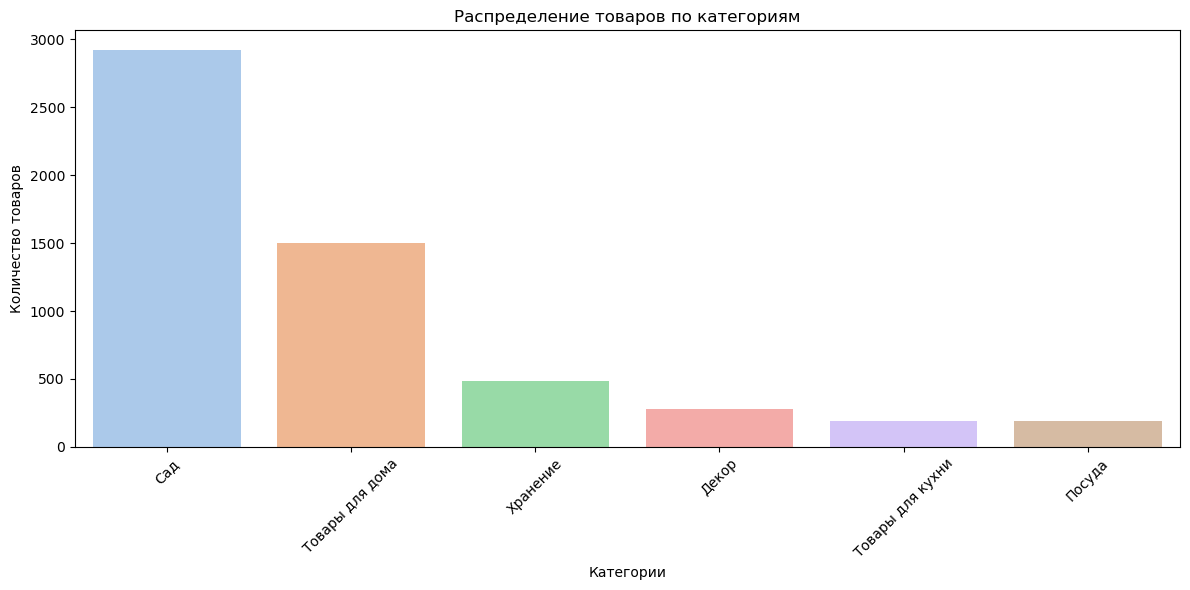

In [25]:
# подсчитаем количество товаров в каждой категории
category_counts = data['category'].value_counts()

# построим график
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel')
plt.title('Распределение товаров по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Самой популярной категорией является "Сад", на втором месте - "Товары для дома" и последнее место занимает категория "Товары для кухни".

**Выводы:**  
В первой части исследования мы познакомились с данными, выявили дубликаты и пропущенные значения, привели к верному типу данных столбец в датой заказа. Также мы распределили все данные на категории: Сад, Товары для кухни, Хранение, Декор, Посуда, Товары для дома и сделали для них отдельный столбец. Самой популярной категорией является "Сад", на втором месте - "Товары для дома" и последнее место занимает категория "Товары для кухни".

## 1.2  Исследовательский анализ данных (EDA)

Посмотрим, какие категории товаров больше всего покупают. Но, прежде, проверим данные на выбросы. Проверим столбец с количеством покупок в заказах.

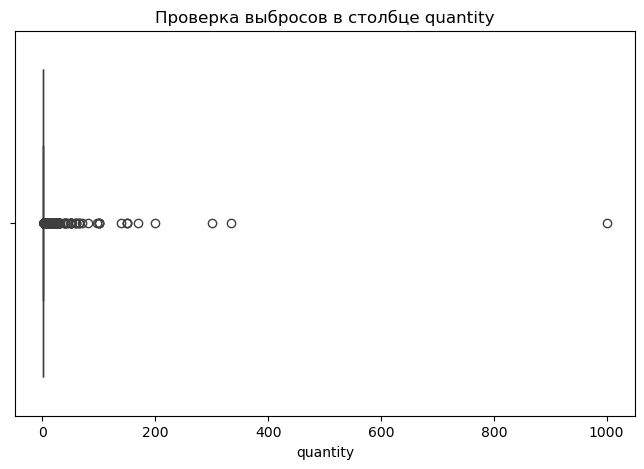

In [26]:
# построим ящик с усами
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['quantity'])
plt.title('Проверка выбросов в столбце quantity')
plt.show()

Видим, что значение 1000 - это явный выброс. Удалим эту строку.

In [27]:
# удалим строку с выбросом
data = data[data['quantity'] != 1000]

Теперь можно приступать к работе.

In [28]:
# посчитаем количество покупок в долях
popular_categories = data['category'].value_counts(normalize=True)
popular_categories.round(2)

category
Сад                 0.53
Товары для дома     0.27
Хранение            0.09
Декор               0.05
Товары для кухни    0.03
Посуда              0.03
Name: proportion, dtype: float64

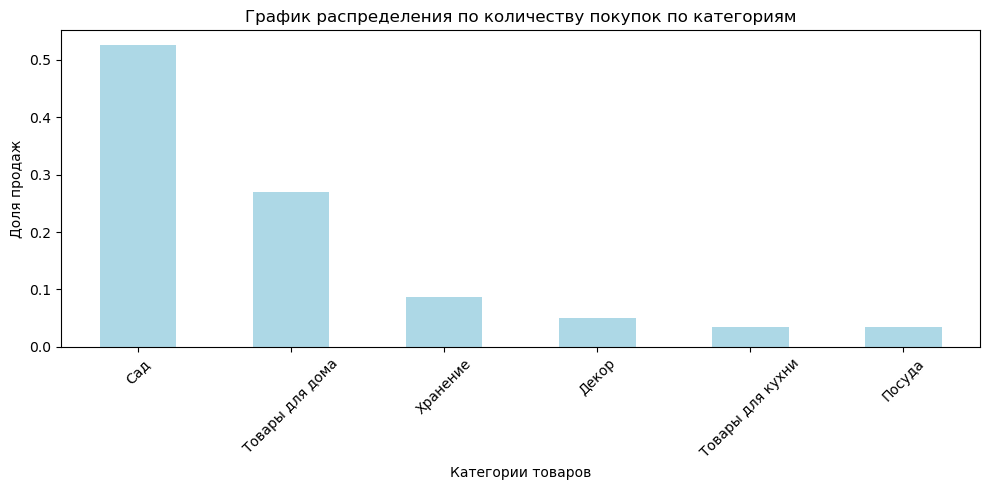

In [29]:
# построим график по продажам
popular_categories.plot(kind = 'bar', figsize = (10,5), color = 'lightblue')
plt.title('График распределения по количеству покупок по категориям')
plt.xlabel('Категории товаров')
plt.ylabel('Доля продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Видим, что львиную долю продаж занимает категория "Сад", на втором месте - "Товары для дома" и меньше всего продаж в категорих "Посуда" и "Товары для кухни".

**Посмотрим лидеров по суммарной выручке.**

In [103]:
# используем .assign() для создания нового столбца
revenue_leaders = (data.assign(revenue=data['price'] * data['quantity'])
                  .groupby('category', as_index=False)['revenue']
                  .sum()
                  .sort_values('revenue', ascending=False)
                  .round(2))

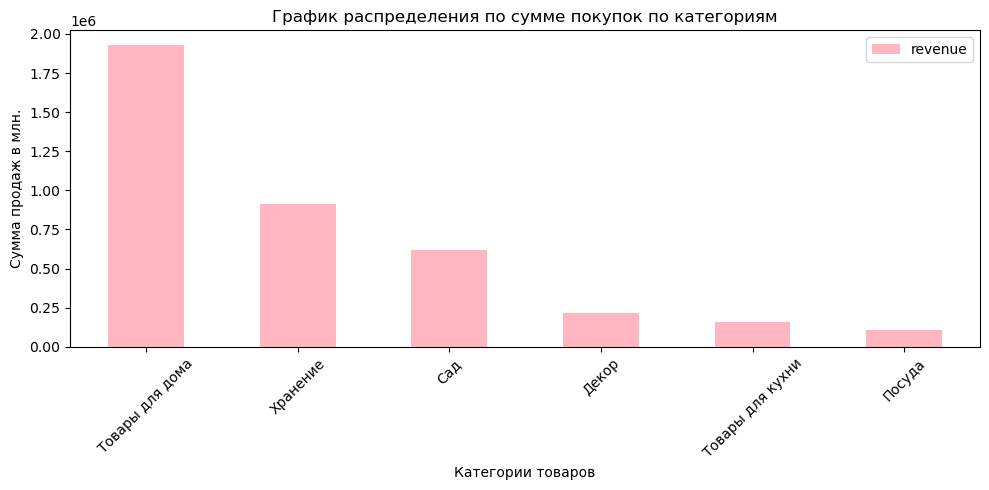

In [31]:
# построим график распределения
revenue_leaders.plot(kind='bar', x='category', y='revenue', figsize=(10, 5), color='lightpink')
plt.title('График распределения по сумме покупок по категориям')
plt.xlabel('Категории товаров')
plt.ylabel('Сумма продаж в млн.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Здесь также лидирует категория "Товары для дома". На втором месте - категория "Хранение" и меньше всего продаж у категории "Посуда".

**Построим бохплот по стоимости товаров по категориям, чтобы определить выбросы.**

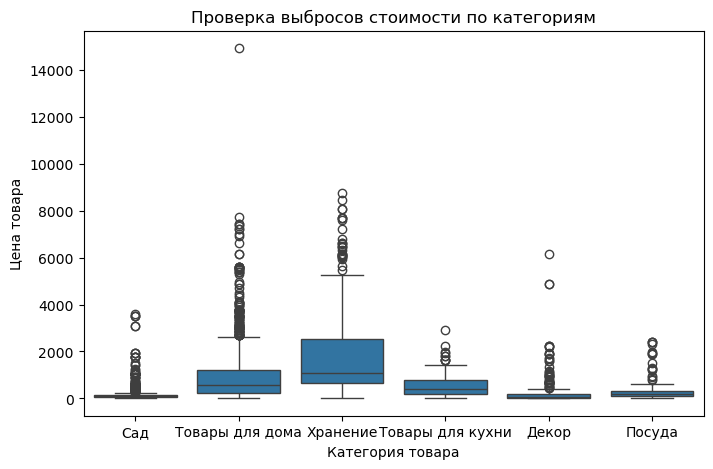

In [32]:
# построим ящик с усами
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.show()

Здесь видим явный выброс в категории "Товары для дома", он зашкаливает. Остальные не такие явные, хотя видим, что выбросы также присутствуют в категории "Декор". Посмотрим на боксплот поближе.

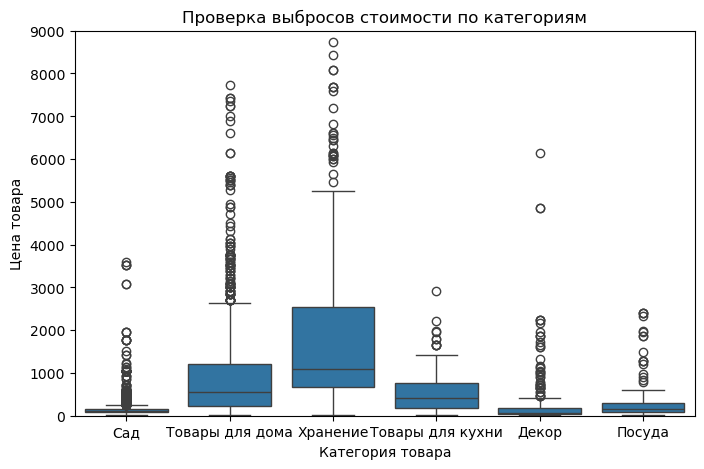

In [33]:
# построим ящик с усами
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,9000)
plt.show()

Рассмотрим каждую категорию внимательнее. Начнем с категории "Cад".

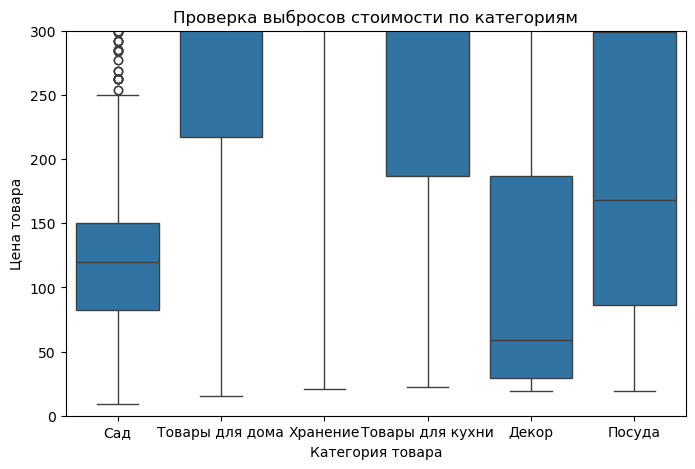

In [34]:
# построим ящик с усами для категории Сад
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,300)
plt.show()

В категории "Сад" медиана находится в районе 120, первый квартиль примерно 70, третий квартиль - 150. Минимальное значение в районе 10, максимальное - 250. 

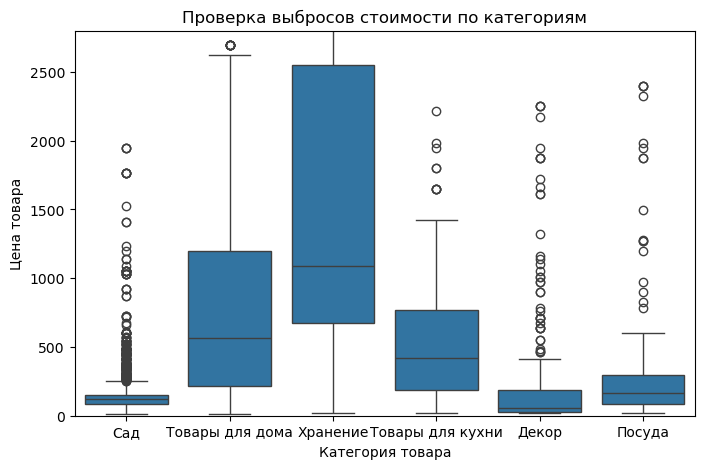

In [35]:
# построим ящик с усами для категории Товары для дома
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,2800)
plt.show()

В категории "Товары для дома" медиана находится в районе 500, первый квартиль примерно 200, третий квартиль - 1200. Минимальное значение в районе 10, максимальное примерно 2700.

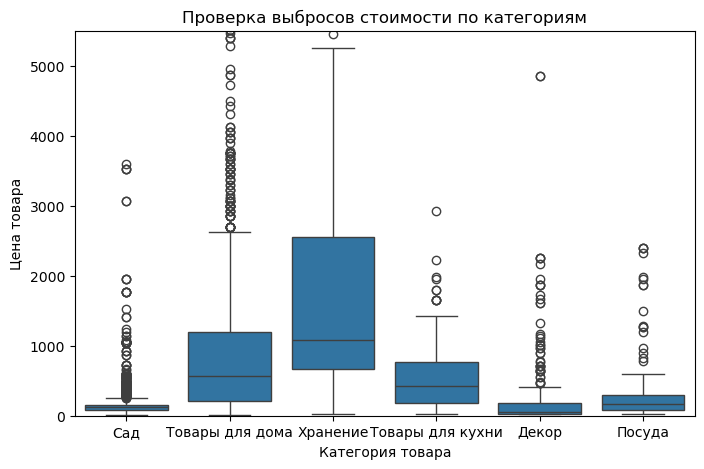

In [36]:
# построим ящик с усами для категории Хранение
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,5500)
plt.show()

Здесь медиана равно 1000, первый квартиль около 700, третий квартиль чуть в районе 2500. Минимальное значение в районе 10, максимальное чуть больше 5000.Разброс достаточно сильный, однако видим, что самые "дорогостоящие" в среднем товары находятся именно в этой категории.

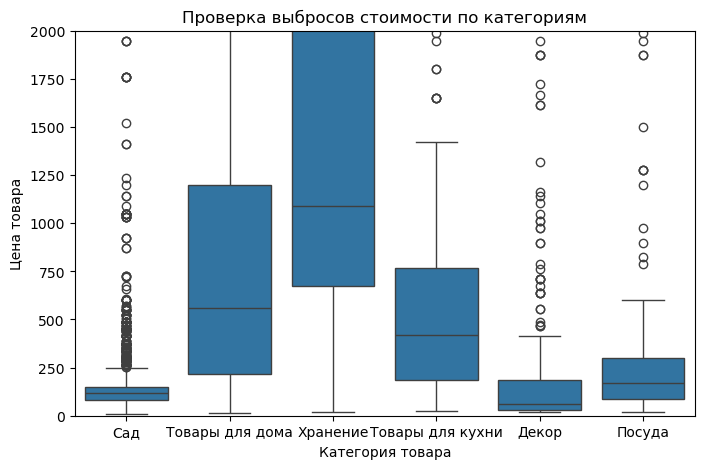

In [37]:
# построим ящик с усами для категории Товары для кухни
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,2000)
plt.show()

Медиана находится в районе 400, первый картиль составляет почти 250, третий - около 800. Минимальное значение также находится в районе 10, максимальное приближено к 1750.

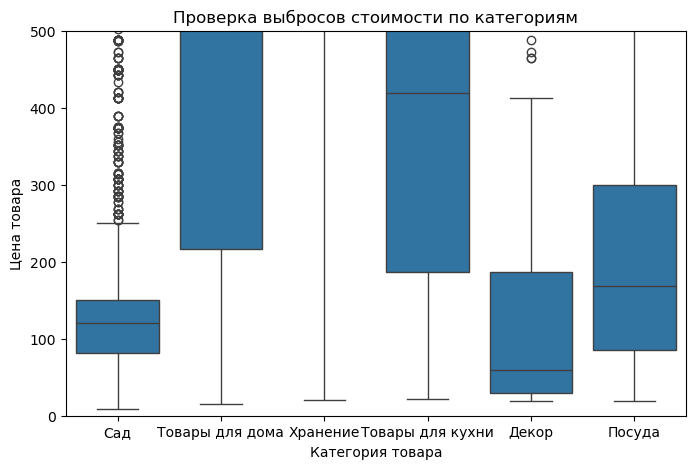

In [38]:
# построим ящик с усами для категории Декор
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,500)
plt.show()

Категория "Декор" не является дорогостоящей и медианное значение приближено к 50-ти. Первый квартиль находится в районе 40, третий на отметке в 200. Минимальное значение составляет примерно 30, максимальное - 400.

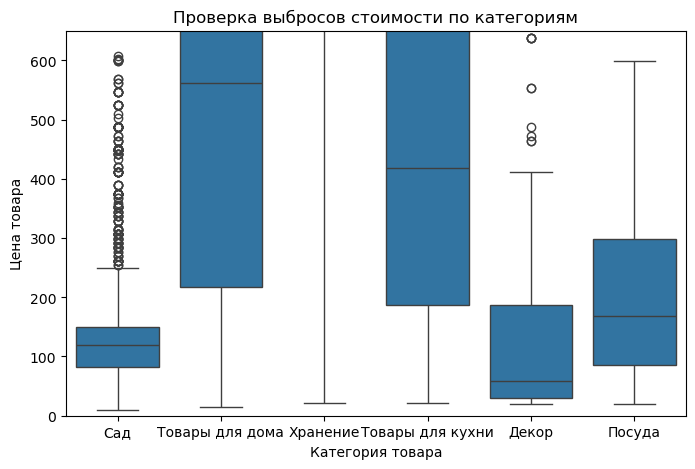

In [39]:
# построим ящик с усами для категории Посуда
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['category'], y = data['price'])
plt.title('Проверка выбросов стоимости по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Цена товара')
plt.ylim(0,650)
plt.show()

В категории "Посуда" медианное значение равно 200, первый квартиль находится на отметке в 100, третий - 300. Минимальное значение составляет около 30, а максимальное - около 600.

**Посмотрим на сезонность покупок**

Разделим даты на месяцы по сезонам и поссчитаем общую выручку по каждому сезону. Для наглядности построим график распределени суммы выручки за каждый период.

season
Зима     1.268523e+06
Весна    8.044350e+05
Лето     6.343740e+05
Осень    1.234829e+06
Name: revenue, dtype: float64

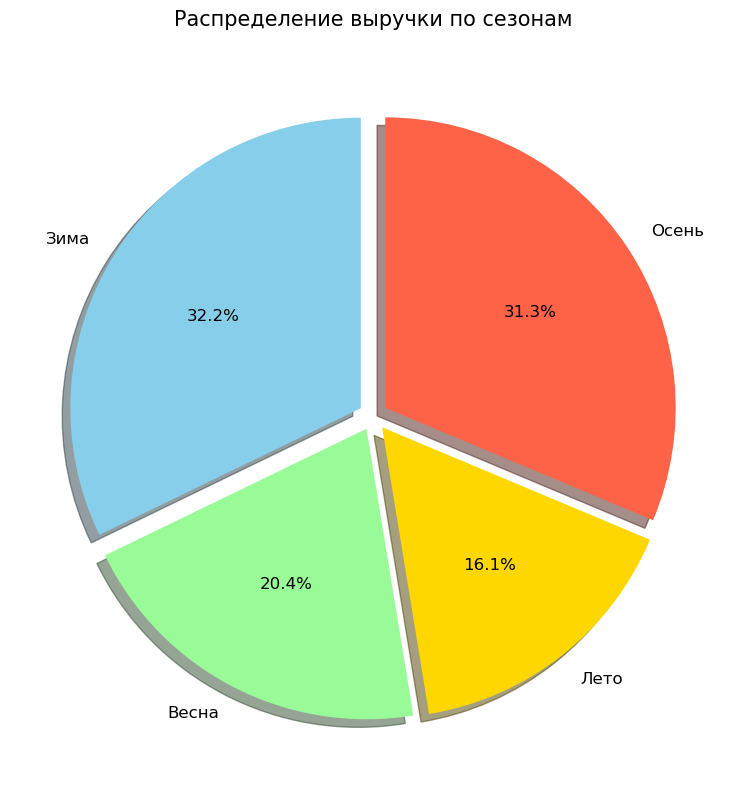

In [105]:
# функция для определения сезона
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'

# создаем копию DataFrame для безопасной модификации
data_clean = data.copy()

# добавляем столбец с сезонами
data_clean['season'] = data_clean['date'].dt.month.apply(get_season)

# считаем сумму выручки по сезонам (с правильным порядком)
season_order = ['Зима', 'Весна', 'Лето', 'Осень']
season_revenue = data_clean.groupby('season')['revenue'].sum().reindex(season_order)

display(season_revenue)

# строим улучшенную круговую диаграмму
plt.figure(figsize=(10, 8))
plt.pie(season_revenue, 
        labels=season_revenue.index, 
        autopct='%1.1f%%', 
        colors=['#87CEEB', '#98FB98', '#FFD700', '#FF6347'],
        startangle=90,
        explode=(0.05, 0.05, 0.05, 0.05),  # Разделение секторов
        shadow=True,
        textprops={'fontsize': 12})

plt.title('Распределение выручки по сезонам', fontsize=15, pad=20)
plt.tight_layout()
plt.show()

Видим, что больше всего продаж происходят в осенний и зимний периоды, чуть меньше приходится на весну и на последнем месте - лето.

**Определим количество повторных покупок**

Определим количество повторных заказов и их долю от всех заказов.

In [41]:
# поссчитаем количество уникальных заказов каждого клиента
order_counts = data.groupby('customer_id')['order_id'].nunique()

# поссчитаем количество повторных заказов
repeat_orders = order_counts[order_counts > 1].sum() - len(order_counts[order_counts > 1])
print('Общее количество повторных заказов:', repeat_orders)

Общее количество повторных заказов: 1091


In [42]:
# поссчитаем долю повторных заказов
total_orders = data['order_id'].nunique()
repeat_order_share = repeat_orders / total_orders * 100
print(f'Доля повторных заказов: {repeat_order_share:.1f}%')

Доля повторных заказов: 31.0%


**Выясним, какое количество товаров чаще всего встречается в заказах**

In [43]:
# поссчитаем общее количество товаров в заказах
total_items_per_order = data.groupby('order_id')['quantity'].sum()

# найдем, какое количество товаров встречается чаще всего
most_common_count = total_items_per_order.mode()[0]
frequency = (total_items_per_order == most_common_count).sum()

print(f"Чаще всего в заказах встречается {most_common_count} товар, количество таких заказов: {frequency}")

Чаще всего в заказах встречается 1 товар, количество таких заказов: 2454


Все-таки чаще всего люди покупают только один товар.

**Выводы:** во второй части нашего исследования мы выявили выбросы в количестве покупок, построили график распределения количества покупок по категориям, выявили лидеров по суммарной выручке от продаж. Им оказалась категория "Товары для дома". Следующим шагом мы построили боксплоты стоимости товаров по категориям, выяснили, что самыми "дорогостоящими" товарами стали товары из категории "Хранение". Также мы рассмотрели сезонность покупок. Видим, что больше всего продаж происходят в осенний и зимний периоды, чуть меньше приходится на весну и на последнем месте - лето. Доля повторных заказов- 31% и самое часток количество покупаемых товаров - 1. 

## 1.3  Выявление сегментов пользователей


Здесь нам предстоить сегментировать покупателей. Для сегментирования возьмем такие данные как давность последней покупки, частота покупок и сумма покупок. Будем использовать RFM-анализ данных. Попробуем разделить клиентов на лояльных, обычных, уходящих, оптовых и потенциальных.

In [44]:
# определим сегодняшнюю дату
today = data['date'].max()
today

Timestamp('2020-01-31 15:00:00')

In [106]:
# создаем копию DataFrame
data_clean = data.copy()

# добавляем новый столбец
data_clean['order_value'] = data_clean['quantity'] * data_clean['price']
data_clean['order_value']

0       142.0
1       194.0
2       112.0
3       179.0
4       112.0
        ...  
7469     76.0
7470    869.0
7471    354.0
7472    128.0
7473    104.0
Name: order_value, Length: 5560, dtype: float64

In [46]:
# рассчитаем RFM
rfm = data.groupby('customer_id').agg({
    'date': lambda x: (today - x.max()).days,        
    'order_id': pd.Series.nunique,                  
    'order_value': 'sum'                           
}).reset_index()

# переименуем столбцы
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm.head()

,customer_id,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0


In [47]:
# рассчитаем среднее и стандартное отклонение для recency, frequency и monetary
stats = rfm.describe().loc[['mean', 'std']]
mean_r, std_r = stats.loc['mean', 'recency'], stats.loc['std', 'recency']
mean_f, std_f = stats.loc['mean', 'frequency'], stats.loc['std', 'frequency']
mean_m, std_m = stats.loc['mean', 'monetary'], stats.loc['std', 'monetary']

In [48]:
# напишем функцию для сегментации по среднему и стандартному отклонению
def segment_value(value, mean, std):
    if value <= mean - std:
        return 'Низкий'
    elif value >= mean + std:
        return 'Высокий'
    else:
        return 'Средний'
    
rfm['recency_segment'] = rfm['recency'].apply(lambda x: segment_value(x, mean_r, std_r))
rfm['frequency_segment'] = rfm['frequency'].apply(lambda x: segment_value(x, mean_f, std_f))
rfm['monetary_segment'] = rfm['monetary'].apply(lambda x: segment_value(x, mean_m, std_m))

In [49]:
# распределим типы клиентов на основе сегментации
def assign_segment(row):
    if row['recency_segment'] == 'Низкий' and row['frequency_segment'] == 'Высокий' and row['monetary_segment'] == 'Высокий':
        return 'Лояльные клиенты'
    elif row['recency_segment'] == 'Средний' and row['frequency_segment'] == 'Средний' and row['monetary_segment'] == 'Средний':
        return 'Обычные клиенты'
    elif row['recency_segment'] == 'Высокий':
        return 'Уходящие клиенты'
    elif row['frequency_segment'] == 'Низкий' and row['monetary_segment'] == 'Высокий':
        return 'Оптовые клиенты'
    else:
        return 'Потенциальные клиенты'

rfm['segment'] = rfm.apply(assign_segment, axis=1)
rfm

,customer_id,recency,frequency,monetary,recency_segment,frequency_segment,monetary_segment,segment
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,Средний,Средний,Средний,Обычные клиенты
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,Средний,Средний,Средний,Обычные клиенты
2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,Средний,Средний,Средний,Обычные клиенты
3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,Высокий,Средний,Средний,Уходящие клиенты
4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,Средний,Средний,Средний,Обычные клиенты
...,...,...,...,...,...,...,...,...
2429,ff601403-b094-4b86-9ac6-264d725b9277,12,2,1739.0,Низкий,Средний,Средний,Потенциальные клиенты
2430,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,93,1,397.0,Средний,Средний,Средний,Обычные клиенты
2431,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,412,1,389.0,Высокий,Средний,Средний,Уходящие клиенты
2432,ffb80538-3fda-4351-8ea9-9d2bec58bb07,144,1,974.0,Средний,Средний,Средний,Обычные клиенты


In [50]:
# посмотрим, какие типы клиентов у нас получились
rfm['segment'].unique()

array(['Обычные клиенты', 'Уходящие клиенты', 'Потенциальные клиенты'],
      dtype=object)

По итогу исследования у нас осталось только три типа клиентов: Обычные клиенты, уходящие и потенциальные. С ними в дальнейшем и будем работать.

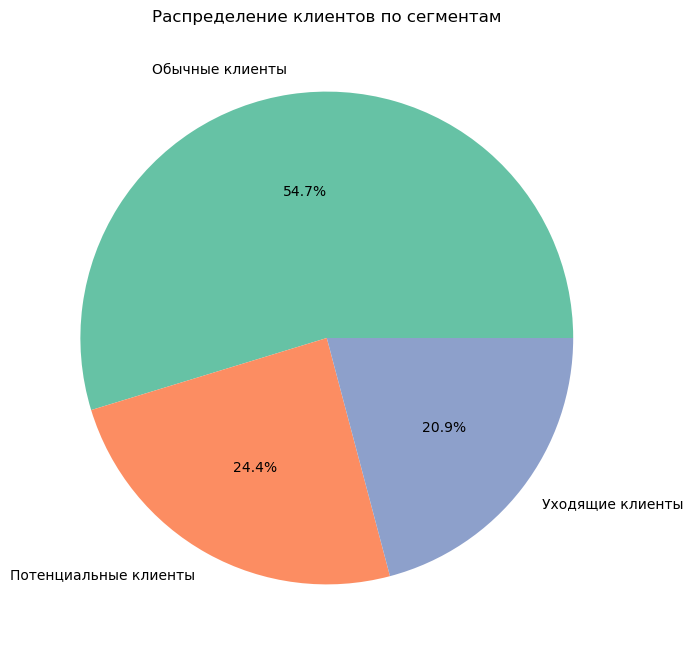

In [51]:
# построим гарфик визуализации
plt.figure(figsize=(8, 8))
rfm['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])
plt.title('Распределение клиентов по сегментам')
plt.ylabel('')
plt.show()

На графике видно, что больше половины у нас занимают обычные клиенты, на втором месте потенциальные клиенты и последнее место занимают уходящие клиенты. Оптовых и лояльных не наблюдается.

**Рассмотрим подробнее каждый из сегментов.**  
  
**Обычные клиенты**

Посмотрим на среднюю сумму покупок у обычных пользователей.

In [52]:
# поссчиатем среднюю сумму покупок у обычных пользователей
mean_monetary_regular = rfm.loc[rfm['segment'] == 'Обычные клиенты', 'monetary'].mean()

print(f"Средняя сумма покупок у обычных клиентов составляет: {mean_monetary_regular:.2f}")

Средняя сумма покупок у обычных клиентов составляет: 1102.05


In [53]:
# посмотрим на дополнительную статистику
rfm.loc[rfm['segment'] == 'Обычные клиенты', 'monetary'].describe()

count    1332.000000
mean     1102.054054
std      1106.085765
min        22.000000
25%       314.000000
50%       734.000000
75%      1486.250000
max      5939.000000
Name: monetary, dtype: float64

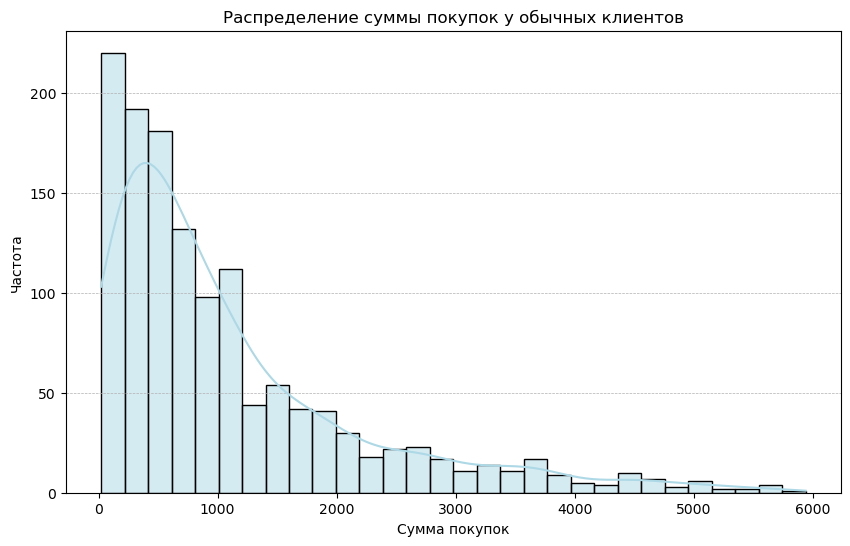

In [54]:
# и построим график распределения для наглядности
regular_customers_monetary = rfm.loc[rfm['segment'] == 'Обычные клиенты', 'monetary']

# построим график распределения
plt.figure(figsize=(10, 6))
sns.histplot(regular_customers_monetary, bins=30, kde=True, color='lightblue')
plt.title('Распределение суммы покупок у обычных клиентов')
plt.xlabel('Сумма покупок')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Обычные пользователи покупают в среднем на 1102. Видим сильный разброс в стандартном отклонении - значит покупки могут существенно отличаться по сумме. Самая низкая усмма покупки - 22, самая высокая- 5939. Медианна существенно меньше среднего, значит были покупатели с большими суммами.

Посмотрим на частоту покупок обычных пользователей.

In [55]:
# выберем обычных пользователей
regular_customers = rfm[rfm['segment'] == 'Обычные клиенты']
regular_customers['frequency'].describe()

count    1332.000000
mean        1.231231
std         0.457659
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: frequency, dtype: float64

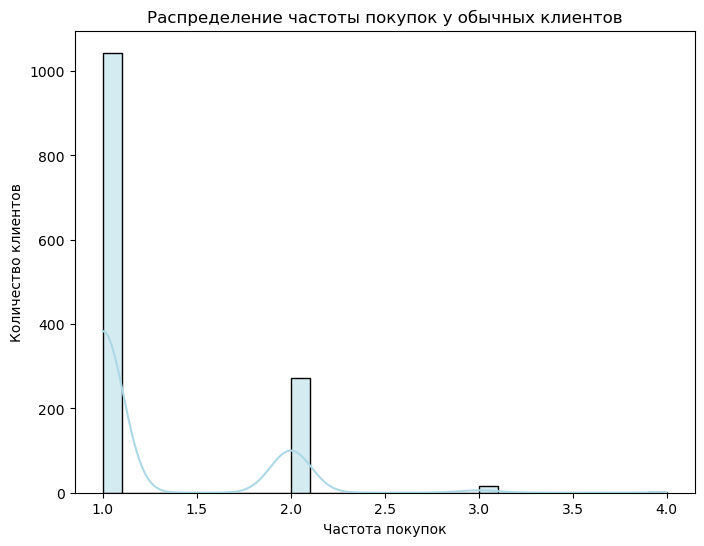

In [56]:
# визуализируем данные
plt.figure(figsize=(8, 6))
sns.histplot(regular_customers['frequency'], bins=30, kde=True, color='lightblue')
plt.title('Распределение частоты покупок у обычных клиентов')
plt.xlabel('Частота покупок')
plt.ylabel('Количество клиентов')
plt.show()

Большая часть обычных покупателей покупает всего один раз. Около 300 клиентов делали покупки дважды и совсем маленький процент с трехкратными покупками.

Рассчитаем средний прайс покупок у обычных пользователей.

In [57]:
# сохраним исходные RFM-данные
rfm_original = rfm.copy()

# объединим таблицы data и rfm, чтобы добавить сегментацию
merged_data = data.merge(rfm_original[['customer_id', 'segment']], on='customer_id', how='left')

# отфильтруем только обычных клиентов
regular_customers_data = merged_data[merged_data['segment'] == 'Обычные клиенты']

# рассчитаем средний прайс для обычных клиентов
average_price_regular = regular_customers_data['price'].mean()
print(f"Средний прайс для обычных клиентов составляет: {average_price_regular:.2f}")

Средний прайс для обычных клиентов составляет: 353.80


In [58]:
# рассчитаем дополнительные статистики для прайса среди обычных клиентов
price_statistics = regular_customers_data['price']
price_statistics.describe()

count    3133.000000
mean      353.804234
std       629.129834
min         9.000000
25%        89.000000
50%       135.000000
75%       239.000000
max      5939.000000
Name: price, dtype: float64

Средний прайс для обычных клиентов составляет: 353. При этом стандартное отклониние также высококе, что говорит о разрозненности в цене покупки. Минимальная усмма покупки составляет 9, максимальная - 5939.

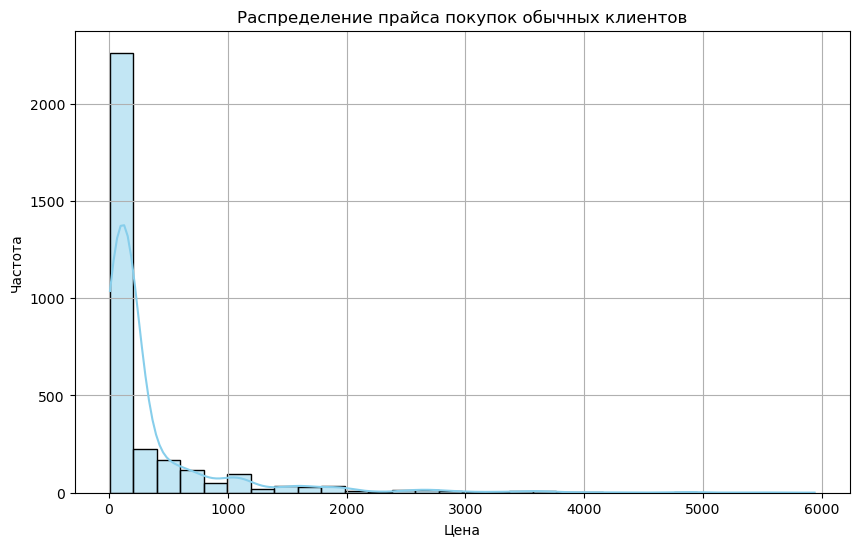

In [59]:
# визуализируем данные
plt.figure(figsize=(10, 6))
sns.histplot(price_statistics, kde=True, bins=30, color='skyblue')
plt.title('Распределение прайса покупок обычных клиентов')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Средняя цена прайса для обычных пользователей составляет 353, минимальный прайс - 9, максимальный - 5939.

Посмотрим на сезонность покупок обычных пользователей.

In [60]:
# объелиним таблицы data и rfm, чтобы добавить сегментацию
merged_data = data.merge(rfm_original[['customer_id', 'segment']], on='customer_id', how='left')

# отфильтруем только обычных клиентов
regular_customers_data = merged_data[merged_data['segment'] == 'Обычные клиенты']

# рассчитаем распределение обычных клиентов по сезонам
season_distribution = regular_customers_data['season'].value_counts(normalize=True)
season_distribution

season
Весна    0.496649
Лето     0.201085
Осень    0.198213
Зима     0.104054
Name: proportion, dtype: float64

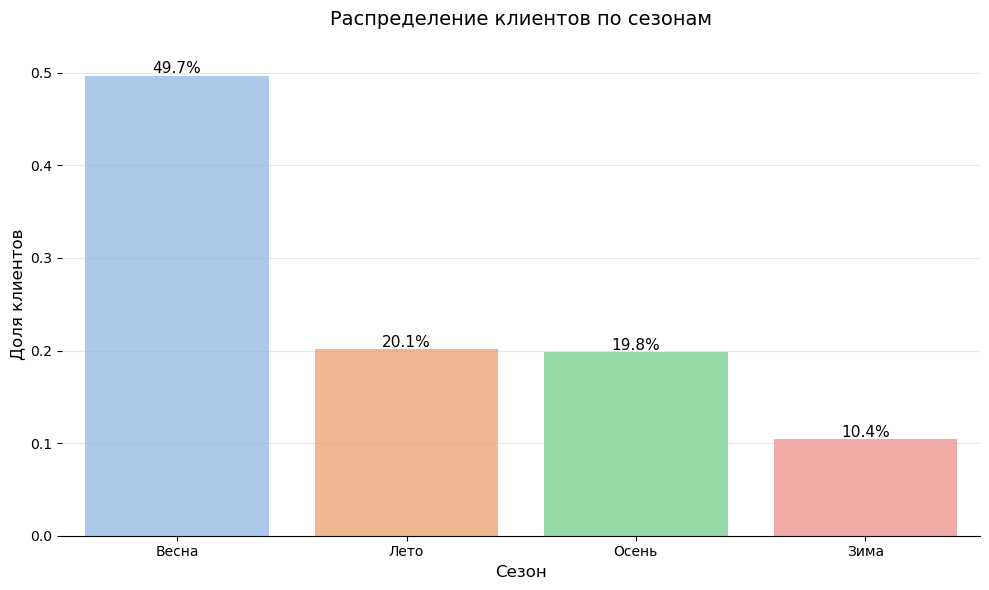

In [108]:
plt.figure(figsize=(10, 6))  # Увеличим размер для лучшей читаемости

# Создаем barplot с явным указанием hue
ax = sns.barplot(
    x=season_distribution.index,
    y=season_distribution.values,
    hue=season_distribution.index,  # Добавляем hue
    palette='pastel',
    dodge=False,  # Отключаем раздвигание столбцов
    legend=False  # Скрываем легенду (так как hue=index)
)

# Настраиваем заголовок и подписи
plt.title('Распределение клиентов по сезонам', fontsize=14, pad=20)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Доля клиентов', fontsize=12)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                fontsize=11, color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Улучшаем внешний вид
sns.despine(left=True)  # Убираем левую границу
plt.grid(axis='y', alpha=0.3)  # Добавляем сетку
plt.tight_layout()
plt.show()

Сегмент "Обычные клиенты" покупают чаще всего весной и меньше всего - зимой.

Посмотрим, какие категории товаров предпочитают обычные пользователи.

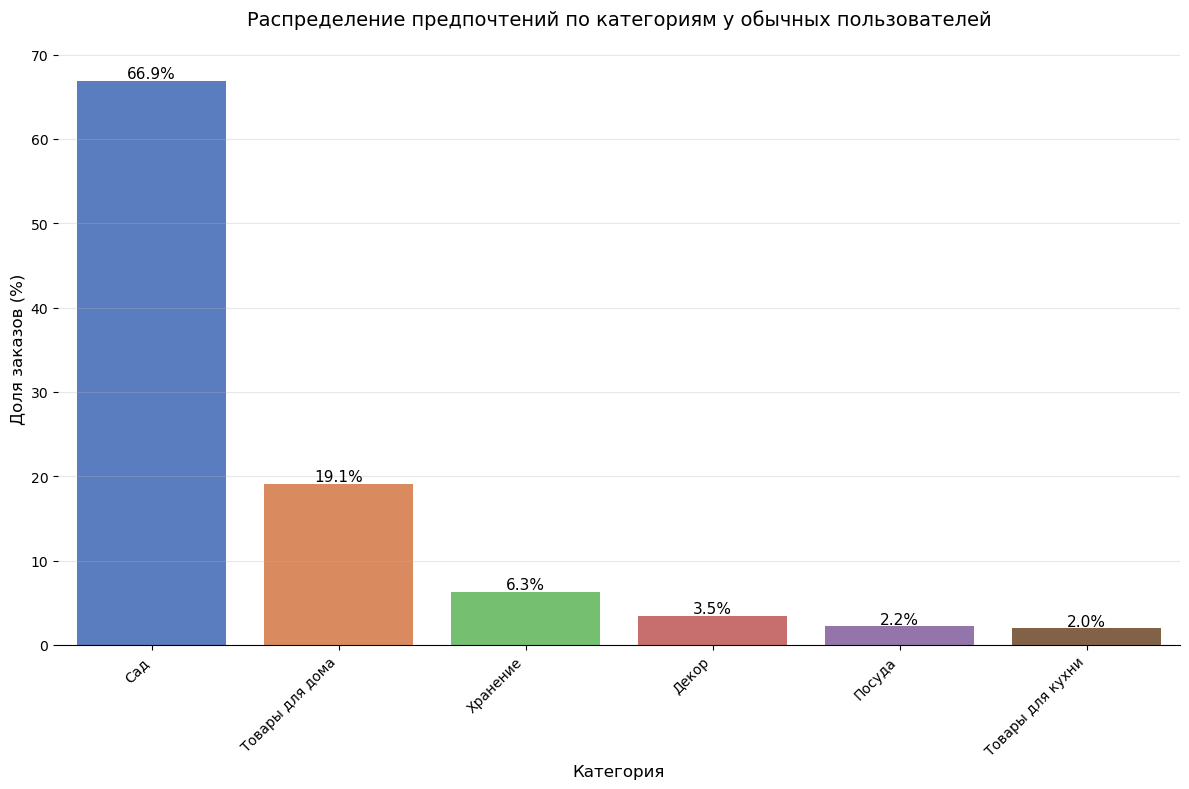

In [109]:
# Рассчитываем доли категорий
category_share = regular_customers_data['category'].value_counts(normalize=True) * 100

# Создаем DataFrame для удобства работы
share_df = category_share.reset_index()
share_df.columns = ['category', 'percentage']

# Строим график
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=share_df,
    x='category',
    y='percentage',
    hue='category',  # Явно указываем hue
    palette='muted',
    legend=False,    # Отключаем легенду
    dodge=False     # Отключаем раздвигание столбцов
)

# Добавляем аннотации
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=11,
        xytext=(0, 5),
        textcoords='offset points'
    )

# Настраиваем оформление
plt.title('Распределение предпочтений по категориям у обычных пользователей', 
          fontsize=14, pad=20)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Доля заказов (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для лучшей читаемости

# Добавляем сетку и убираем лишние линии
sns.despine(left=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Больше половины обычных пользователй предпочитают категорию "Сад", на втором месте - "Товары для дома" и на помледнем - "Товары для кухни".

Построим график сезонности категорий покупок для обычных пользователей.

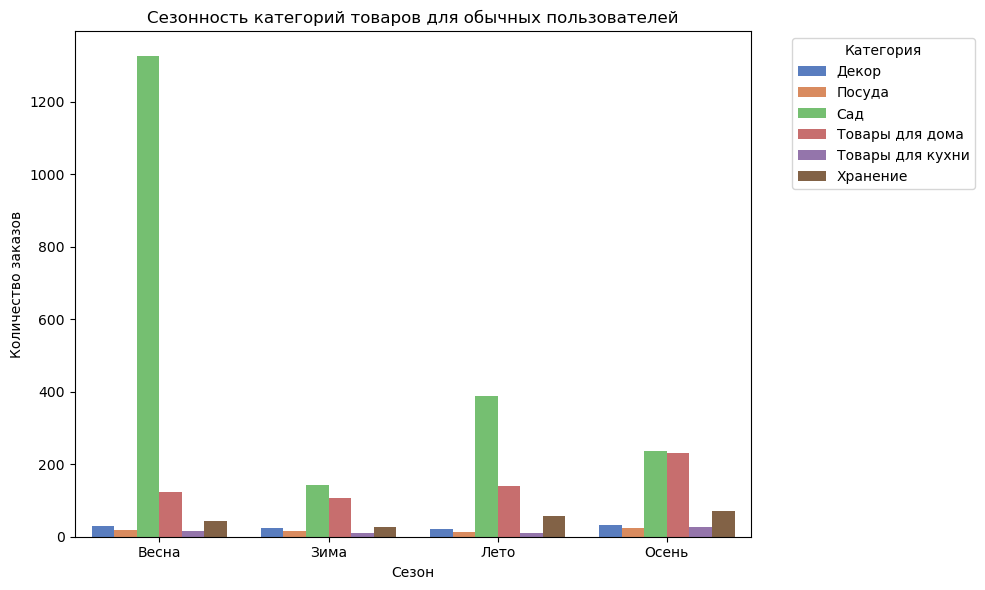

In [63]:
# сгруппируем данные по категориям и сезонам
seasonal_data = regular_customers_data.groupby(['category', 'season']).size().reset_index(name='count')

# построим график
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='count', hue='category', palette='muted')

plt.title('Сезонность категорий товаров для обычных пользователей')
plt.xlabel('Сезон')
plt.ylabel('Количество заказов')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Обычные покупатели во все времена года покупают больше всего товаров из категории "Сад", на втором месте категория "Товары для дома". Осенью эти показатели максимально приближены друг к дургу и также осенью самый высокий уровень заказов из категории "Хранение" и "Товары для кухни". 

**Рассмотрим сегмент "Потенциальные клиенты"**

Посмотрим на среднюю сумму покупок у потенциальных клиентов.

In [64]:
# поссчитаем среднюю сумму покупок у потенциальных клиентов
mean_monetary_potential = rfm.loc[rfm['segment'] == 'Потенциальные клиенты', 'monetary'].mean()
print(f"Средняя сумма покупок у потенциальных клиентов составляет: {mean_monetary_potential:.2f}")

Средняя сумма покупок у потенциальных клиентов составляет: 2597.53


In [65]:
# посмотрим на дополнительную статистику
potential_clients_monetary = rfm.loc[rfm['segment'] == 'Потенциальные клиенты', 'monetary']
potential_clients_monetary.describe()

count       594.000000
mean       2597.534371
std        7434.025416
min          15.000000
25%         598.250000
50%        1146.250000
75%        2811.000000
max      159508.000000
Name: monetary, dtype: float64

Здесь видим очень сильный разрыв между минимальной суммой заказа и максимальной. Стандартное отклонени очень высокое. Разберем подробнее.

In [66]:
# отфильтруем потенциальных клиентов
potential_clients_filtered = merged_data[merged_data['segment'] == 'Потенциальные клиенты']
display(potential_clients_filtered.head())

,date,customer_id,order_id,product,quantity,price,category,revenue,season,order_value,segment
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,Товары для дома,674.0,Осень,674.0,Потенциальные клиенты
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,Товары для дома,1162.0,Осень,1162.0,Потенциальные клиенты
60,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.0,Товары для дома,860.0,Осень,860.0,Потенциальные клиенты
61,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749.0,Товары для дома,749.0,Осень,749.0,Потенциальные клиенты
124,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.0,Хранение,742.0,Осень,742.0,Потенциальные клиенты


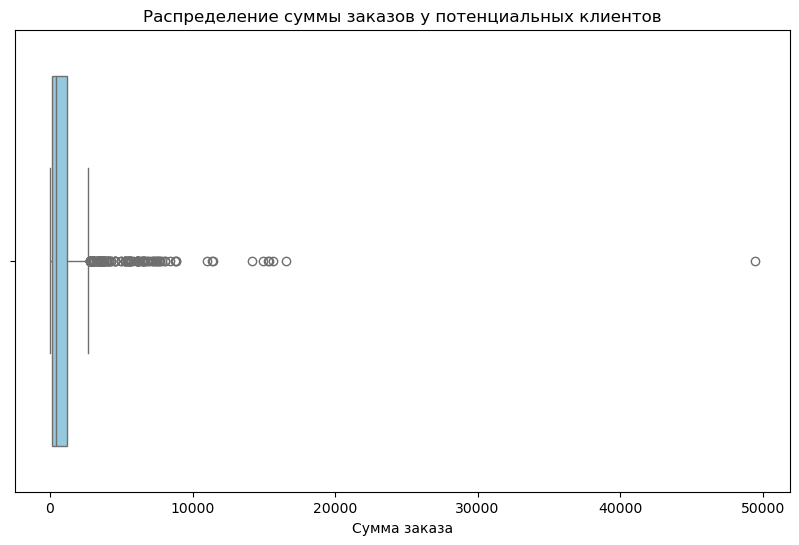

In [67]:
# построим боксплот дял того, чтобы выявить выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=potential_clients_filtered['order_value'], color='skyblue')
plt.title('Распределение суммы заказов у потенциальных клиентов')
plt.xlabel('Сумма заказа')
plt.show()

Видим явный выброс. Избавимся от него и построим новую статистику.

In [68]:
# удалим выбросы
potential_clients_filtered = potential_clients_filtered[potential_clients_filtered['order_value'] <= 40000]
potential_clients_filtered['order_value'].describe()

count     1367.000000
mean      1092.540905
std       1824.716956
min          9.000000
25%        134.000000
50%        427.000000
75%       1150.500000
max      16536.000000
Name: order_value, dtype: float64

Теперь больше похоже на реальность. Посмотрим на среднюю сумму покупок потенциальных клиентов после удаления выбросов.

In [69]:
# поссчитаем среднюю сумму покупок
mean_order_value = potential_clients_filtered['order_value'].mean()
print(f"Средняя сумма покупок у потенциальных клиентов: {mean_order_value:.2f}")

Средняя сумма покупок у потенциальных клиентов: 1092.54


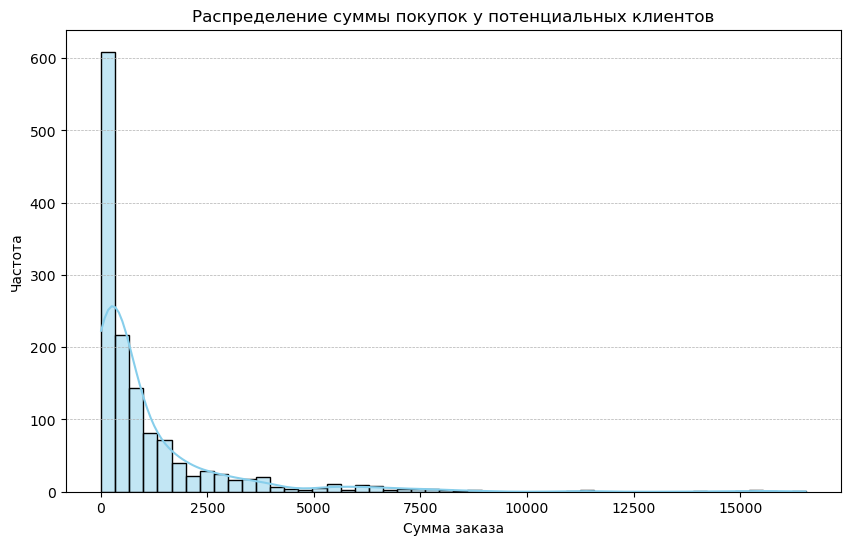

In [70]:
# построим гистаграмму
plt.figure(figsize=(10, 6))

sns.histplot(potential_clients_filtered['order_value'], bins=50, kde=True, color='skyblue')
plt.title('Распределение суммы покупок у потенциальных клиентов')
plt.xlabel('Сумма заказа')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Средняя сумма заказов у потенциальных клиентов составляет 1092. Минимальный заказ - 9, максимальный - 16536. Присутствует разрозненность сумм в заказах. Посмотрим на частоту покупок у потенициальных пользователей.

In [71]:
# выберем потенциальных пользователей
potential_customers = rfm[rfm['segment'] == 'Потенциальные клиенты']
potential_customers['frequency'].describe()

count    594.000000
mean       2.203704
std        5.136313
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max      126.000000
Name: frequency, dtype: float64

Максимальное значение в 126 покупок кажется странным, проверим его на выбросы.

In [72]:
# объединим potential_clients_filtered с rfm 
potential_clients_filtered = potential_clients_filtered.merge(
    rfm[['customer_id', 'frequency']],  
    on='customer_id', 
    how='left'  
)

display(potential_clients_filtered.head())

,date,customer_id,order_id,product,quantity,price,category,revenue,season,order_value,segment,frequency
0,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,Товары для дома,674.0,Осень,674.0,Потенциальные клиенты,126
1,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,Товары для дома,1162.0,Осень,1162.0,Потенциальные клиенты,126
2,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.0,Товары для дома,860.0,Осень,860.0,Потенциальные клиенты,126
3,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749.0,Товары для дома,749.0,Осень,749.0,Потенциальные клиенты,126
4,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.0,Хранение,742.0,Осень,742.0,Потенциальные клиенты,126


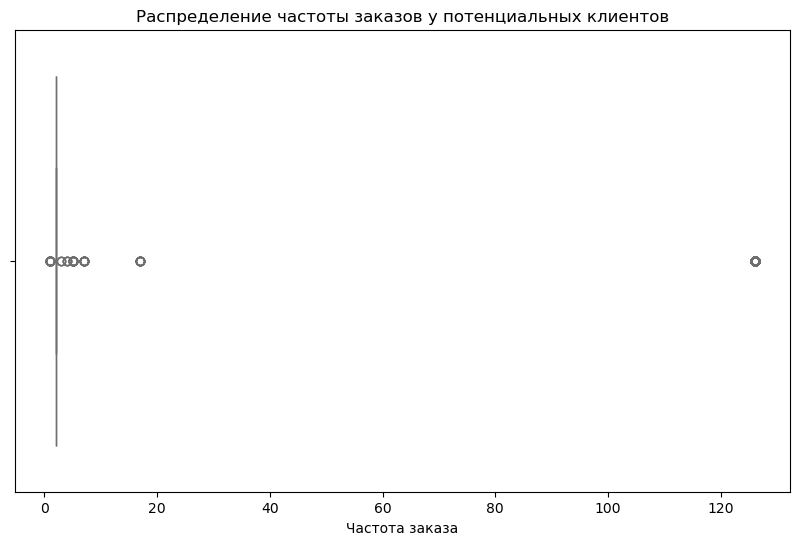

In [73]:
# построим боксплот для того, чтобы выявить выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=potential_clients_filtered['frequency'], color='skyblue')
plt.title('Распределение частоты заказов у потенциальных клиентов')
plt.xlabel('Частота заказа')
plt.show()

Здесь также выброс в значении около 130. Удалим его.

In [74]:
# удаляем строки
potential_clients_filtered = potential_clients_filtered[potential_clients_filtered['frequency'] <= 120]

# посмотрим на обновленную статистику
potential_clients_filtered['frequency'].describe()

count    1224.000000
mean        2.336601
std         1.909506
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        17.000000
Name: frequency, dtype: float64

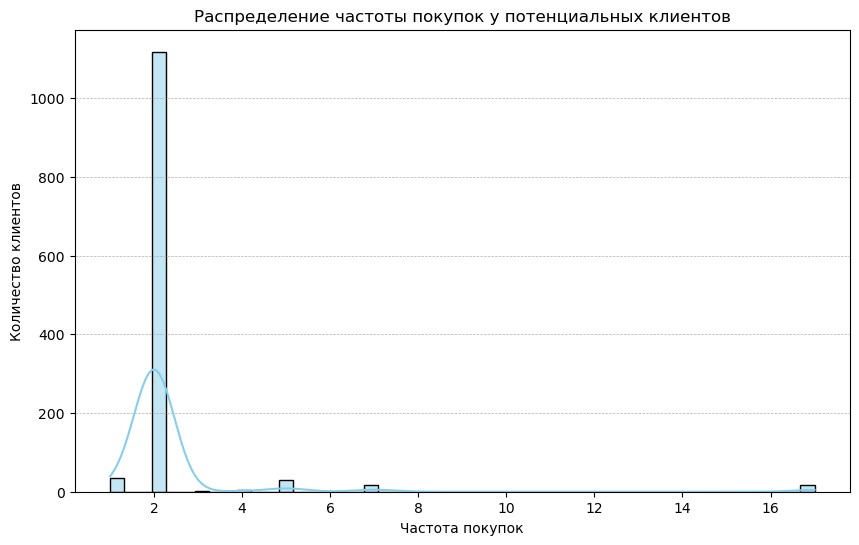

In [75]:
# построим график визуализации
plt.figure(figsize=(10, 6))

sns.histplot(potential_clients_filtered['frequency'], bins=50, kde=True, color='skyblue')
plt.title('Распределение частоты покупок у потенциальных клиентов')
plt.xlabel('Частота покупок')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Потенциальные клиенты чаще всего покупают дважды. Посмотрим на распределение по прайсу.

In [76]:
# рассчитаем дополнительные статистики для цен среди обычных клиентов
price_statistics_potential = potential_clients_filtered['price']
price_statistics_potential.describe()

count     1224.000000
mean       955.821419
std       1495.038530
min          9.000000
25%        120.000000
50%        393.000000
75%       1050.000000
max      14917.000000
Name: price, dtype: float64

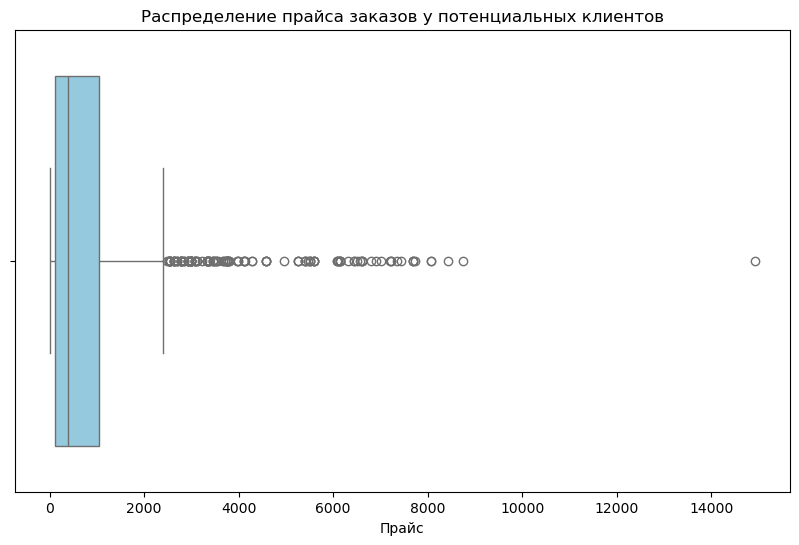

In [77]:
# построим боксплот для того, чтобы выявить выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=potential_clients_filtered['price'], color='skyblue')
plt.title('Распределение прайса заказов у потенциальных клиентов')
plt.xlabel('Прайс')
plt.show()

In [78]:
# удалим выброс
potential_clients_filtered = potential_clients_filtered[potential_clients_filtered['price'] <= 14000]

# рассчитаем дополнительные статистики для цен среди обычных клиентов
price_statistics_potential = potential_clients_filtered['price']
price_statistics_potential.describe()

count    1223.000000
mean      944.405901
std      1441.296070
min         9.000000
25%       120.000000
50%       389.000000
75%      1049.500000
max      8737.000000
Name: price, dtype: float64

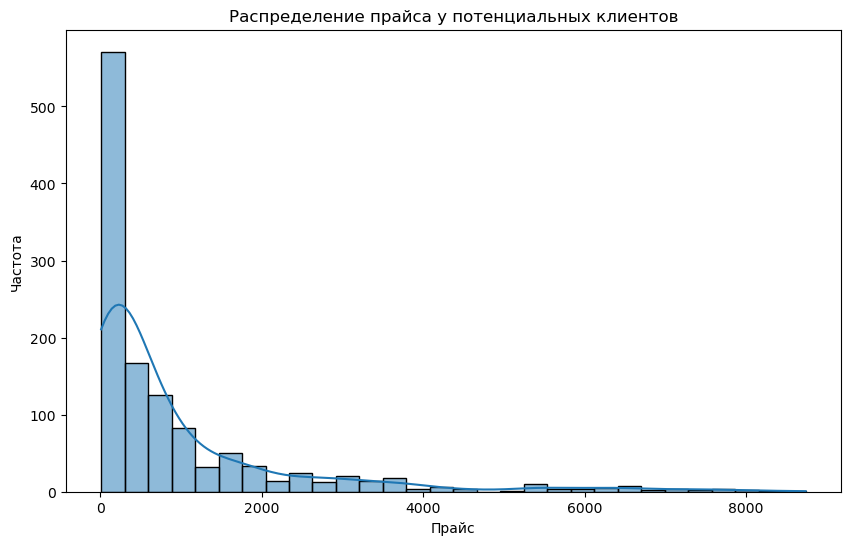

In [79]:
# построим гистограмму для price у потенциальных клиентов
plt.figure(figsize=(10, 6))
sns.histplot(potential_clients_filtered['price'], bins=30, kde=True)
plt.title('Распределение прайса у потенциальных клиентов')
plt.xlabel('Прайс')
plt.ylabel('Частота')
plt.show()

В данных по прайсу выявили выброс и удалили его. По обновленным данным можно сказать, что средний прайс для потенциальных клиентов составляет 944, минимальный - 9, максимальный - 8737.

Посмотрим на сезонность покупок потенциальных пользователей.

In [80]:
# посмотрим на сезонность
season_distribution_potential = potential_clients_filtered['season'].value_counts(normalize=True)
season_distribution_potential

season
Зима     0.543745
Весна    0.205233
Лето     0.139820
Осень    0.111202
Name: proportion, dtype: float64

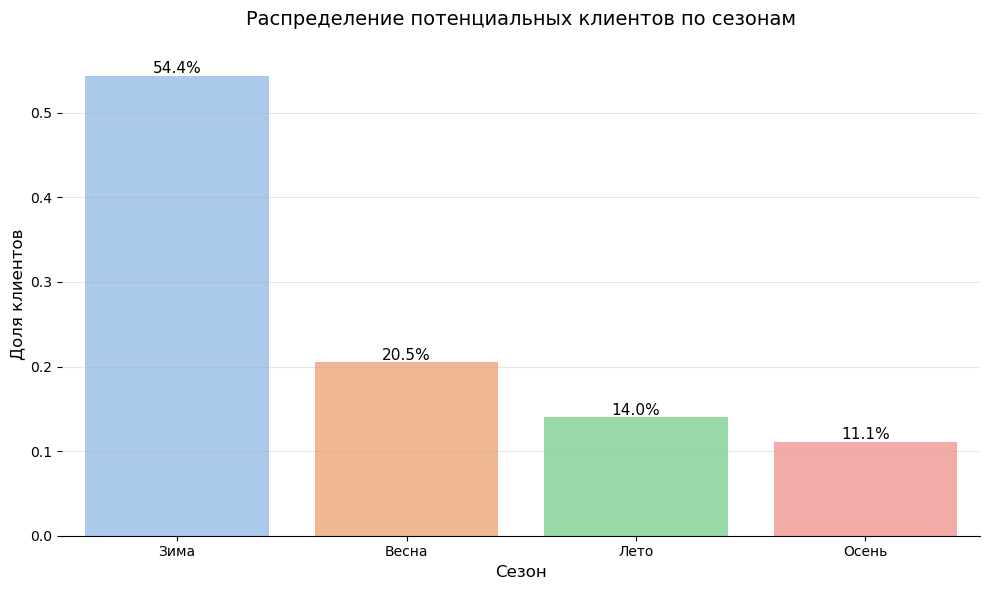

In [110]:
plt.figure(figsize=(10, 6))  # Увеличиваем размер графика

# Создаем barplot с правильными параметрами
ax = sns.barplot(
    x=season_distribution_potential.index,
    y=season_distribution_potential.values,  # Исправлено: используем potential для y
    hue=season_distribution_potential.index,  # Добавляем hue
    palette='pastel',
    dodge=False,
    legend=False
)

# Добавляем значения на столбцы
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1%}',  # Форматируем как проценты
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=11,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Настраиваем оформление
plt.title('Распределение потенциальных клиентов по сезонам', fontsize=14, pad=20)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Доля клиентов', fontsize=12)
plt.xticks(rotation=0)  # Горизонтальные подписи

# Улучшаем внешний вид
sns.despine(left=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Потенцильные клиенты чаще всего покупают зимой и реже всего осенью. Посмотрим какие категории товаров предпоситают потенциальные покупатели

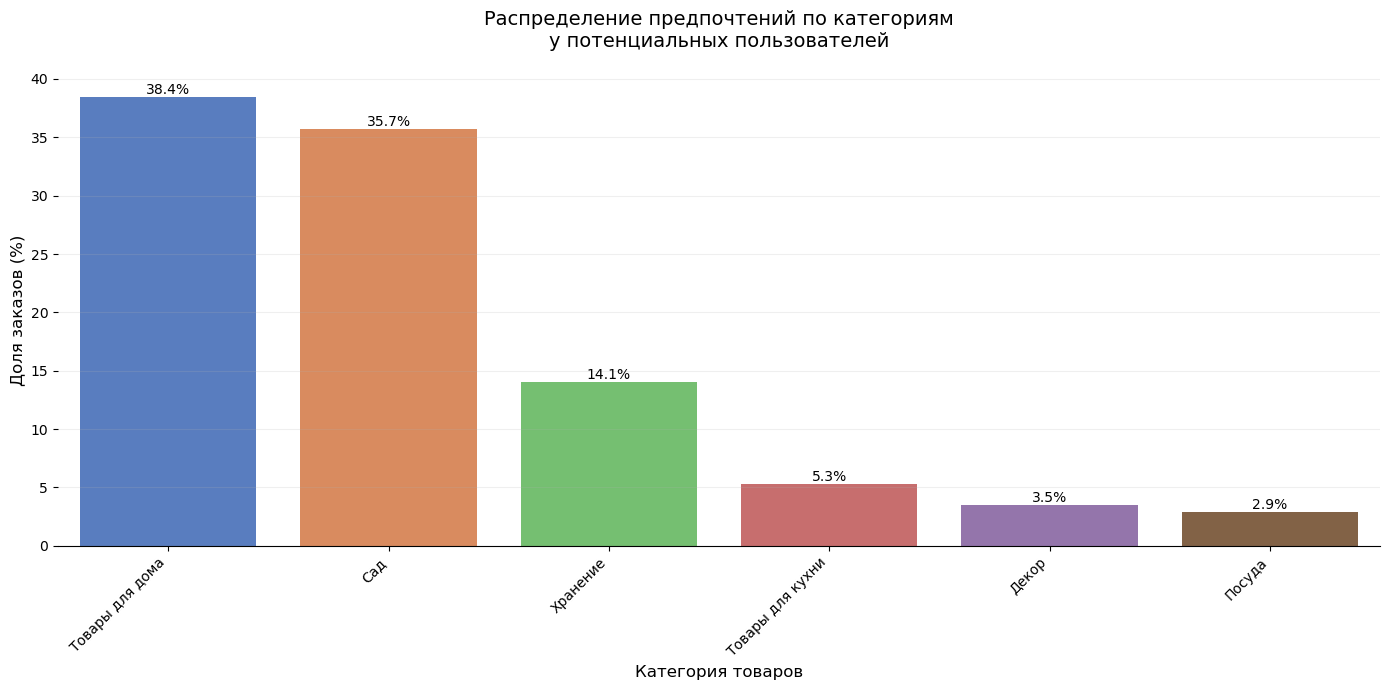

In [111]:
# Рассчитываем доли категорий
category_share_potential = potential_clients_filtered['category'].value_counts(normalize=True) * 100

# Сортируем по убыванию для лучшего представления
category_share_potential = category_share_potential.sort_values(ascending=False)

# Создаем график
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=category_share_potential.index,
    y=category_share_potential.values,
    hue=category_share_potential.index,  # Явно указываем hue
    palette='muted',
    dodge=False,
    legend=False
)

# Добавляем подписи значений
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10,
        xytext=(0, 5),
        textcoords='offset points'
    )

# Настраиваем оформление
plt.title('Распределение предпочтений по категориям\nу потенциальных пользователей', 
          fontsize=14, pad=20)
plt.xlabel('Категория товаров', fontsize=12)
plt.ylabel('Доля заказов (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для читаемости

# Улучшаем визуализацию
sns.despine(left=True)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()

Потенциальные пользователи предпочитают товары из категории "Товары для дома", на втором месте категория "Сад" и последнее место занимает категория "Посуда".

Посмотрим распределение покупок по категориям товара по сезонности.

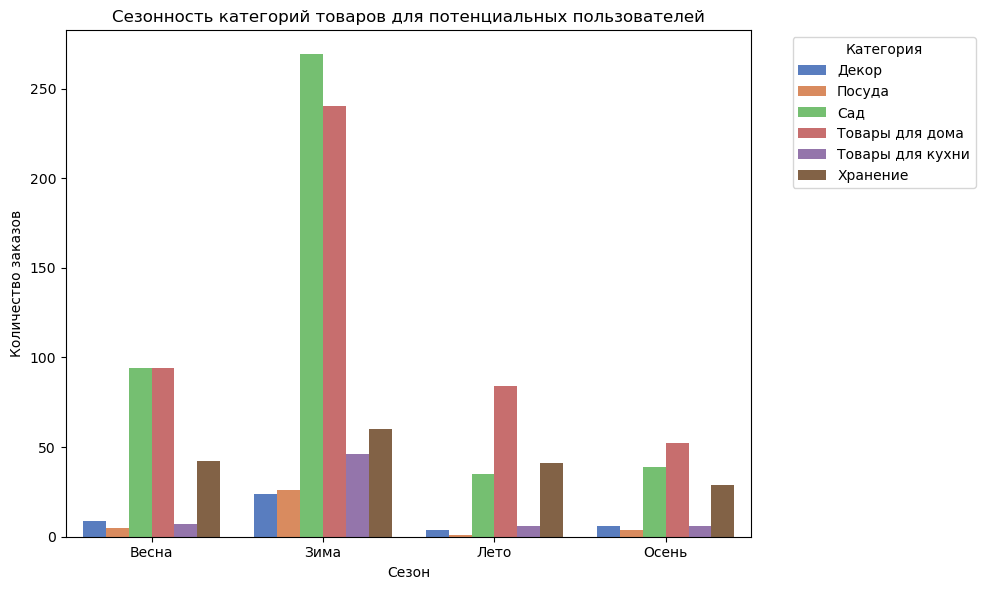

In [83]:
# сгруппируем данные по категориям и сезонам
seasonal_data_potential = potential_clients_filtered.groupby(['category', 'season']).size().reset_index(name='count')

# построим график
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data_potential, x='season', y='count', hue='category', palette='muted')

plt.title('Сезонность категорий товаров для потенциальных пользователей')
plt.xlabel('Сезон')
plt.ylabel('Количество заказов')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Весной потенциальные покупатели одинакого много покупают товаров из категорий "Сад" и "Товары для дома", зимой на первой место выходят товары из категории "Сад", на втором месте - "Товары для дома". Летом и осенью больше всего покупают товары из категории "Товары для дома", далее идут товары для сада. Самый прибыльный сезон для категорий "Хранение" и "Товары для кухни" - зима.

**Рассмотрим сегмент "Уходящие клиенты"**

In [84]:
# поссчиатем среднюю сумму покупок у уходящих пользователей
mean_monetary_outgoing = rfm.loc[rfm['segment'] == 'Уходящие клиенты', 'monetary'].mean()

print(f"Средняя сумма покупок у уходящих клиентов составляет: {mean_monetary_outgoing:.2f}")

Средняя сумма покупок у уходящих клиентов составляет: 1833.25


In [85]:
# посмотрим на дополнительную статистику по уходящим клиентам
outgoing_clients_monetary = rfm.loc[rfm['segment'] == 'Уходящие клиенты', 'monetary']
outgoing_clients_monetary.describe()

count      508.000000
mean      1833.246063
std       4467.591857
min         15.000000
25%        418.000000
50%        891.000000
75%       1799.000000
max      57278.000000
Name: monetary, dtype: float64

Огромный разрыв в минимальном и максимальных значениях, высокок отклонение. Проверим данные на выбросы.

In [86]:
# отфильруем уходящих клиентов
outgoing_clients= merged_data[merged_data['segment'] == 'Уходящие клиенты']
outgoing_clients.head()

,date,customer_id,order_id,product,quantity,price,category,revenue,season,order_value,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Сад,142.0,Осень,142.0,Уходящие клиенты
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,Сад,194.0,Осень,194.0,Уходящие клиенты
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Сад,112.0,Осень,112.0,Уходящие клиенты
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Сад,179.0,Осень,179.0,Уходящие клиенты
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Сад,112.0,Осень,112.0,Уходящие клиенты


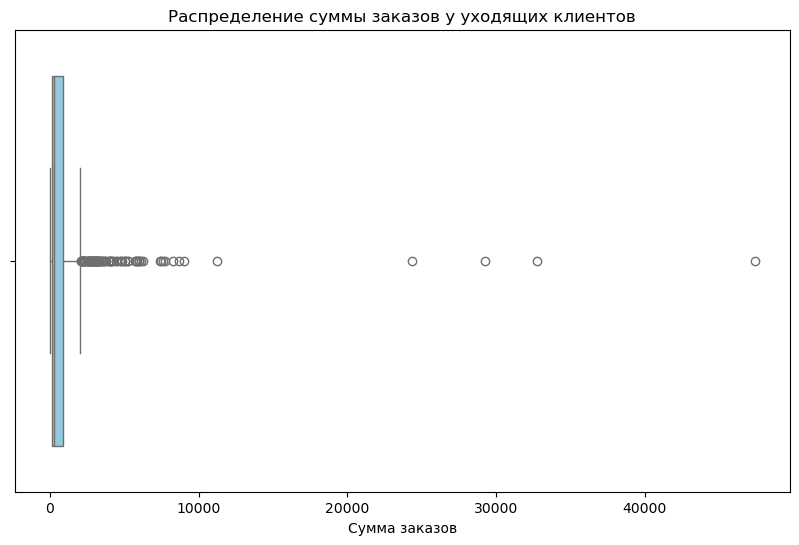

In [87]:
# построим боксплот для того, чтобы выявить выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=outgoing_clients['order_value'], color='skyblue')
plt.title('Распределение суммы заказов у уходящих клиентов')
plt.xlabel('Сумма заказов')
plt.show()

Заказы после 20 000 сильно меняют картину. Примем их за выбросы и удалим.

In [88]:
# удалим выброс
outgoing_clients = outgoing_clients[outgoing_clients['order_value'] <= 20000]
outgoing_clients['order_value'].describe()

count     1055.000000
mean       755.988626
std       1203.570247
min          9.000000
25%        149.000000
50%        268.000000
75%        899.000000
max      11250.000000
Name: order_value, dtype: float64

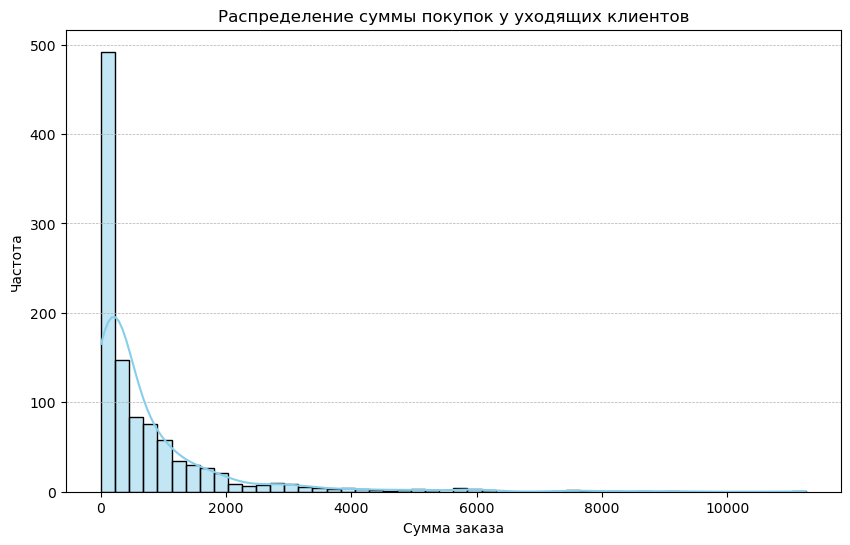

In [89]:
# построим гистаграмму
plt.figure(figsize=(10, 6))

sns.histplot(outgoing_clients['order_value'], bins=50, kde=True, color='skyblue')
plt.title('Распределение суммы покупок у уходящих клиентов')
plt.xlabel('Сумма заказа')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Теперь видим, что средняя сумма покупки у уходящих пользователей 755, минимальная сумма - 9, максимальная - 11250. Посмотрим на частоту покупок.

In [90]:
# посмотрим статистику по уходящим клиентам
outgoing_clients = outgoing_clients.merge(
    rfm[['customer_id', 'frequency']],  
    on='customer_id', 
    how='left'  
)

outgoing_clients['frequency'].describe()

count    1055.000000
mean        2.562085
std         6.860060
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        35.000000
Name: frequency, dtype: float64

Прооверим максимальное значение.

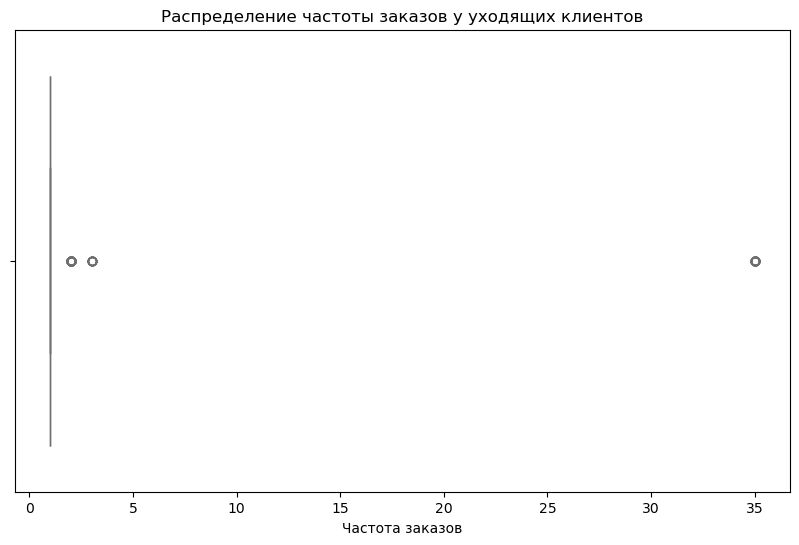

In [91]:
# построим боксплот для того, чтобы выявить выбросы
plt.figure(figsize=(10, 6))
sns.boxplot(x=outgoing_clients['frequency'], color='skyblue')
plt.title('Распределение частоты заказов у уходящих клиентов')
plt.xlabel('Частота заказов')
plt.show()

In [92]:
# удалим выброс
outgoing_clients = outgoing_clients[outgoing_clients['frequency'] != 35]
outgoing_clients['frequency'].describe()

count    1010.000000
mean        1.116832
std         0.375427
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: frequency, dtype: float64

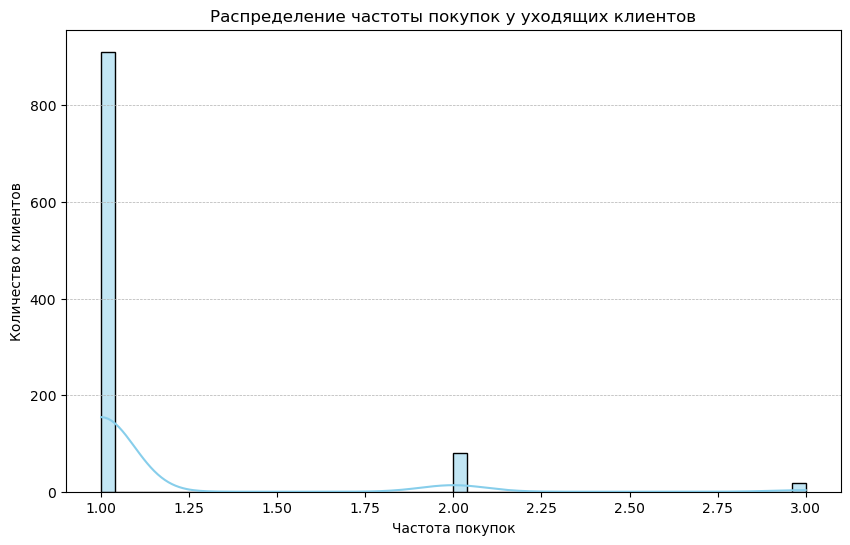

In [93]:
# построим график визуализации
plt.figure(figsize=(10, 6))

sns.histplot(outgoing_clients['frequency'], bins=50, kde=True, color='skyblue')
plt.title('Распределение частоты покупок у уходящих клиентов')
plt.xlabel('Частота покупок')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

В среднем уходящие клиенты заказывали всего один раз. Максимальное число заказов - 3. Посмотрим на средний прайс.

In [94]:
# рассчитаем статистику по прайсу
outgoing_clients['price'].describe()

count    1010.000000
mean      497.749505
std       844.189419
min         9.000000
25%       101.000000
50%       187.000000
75%       488.000000
max      7597.000000
Name: price, dtype: float64

Средний прайс составляет 497, минимальный - 9, максимальный - 7597. Посмотрим на сезонность покупок уходящих пользователей.

In [95]:
# посмотрим на сезонность
season_distribution_outgoing = outgoing_clients['season'].value_counts(normalize=True)
season_distribution_outgoing

season
Осень    0.7
Зима     0.3
Name: proportion, dtype: float64

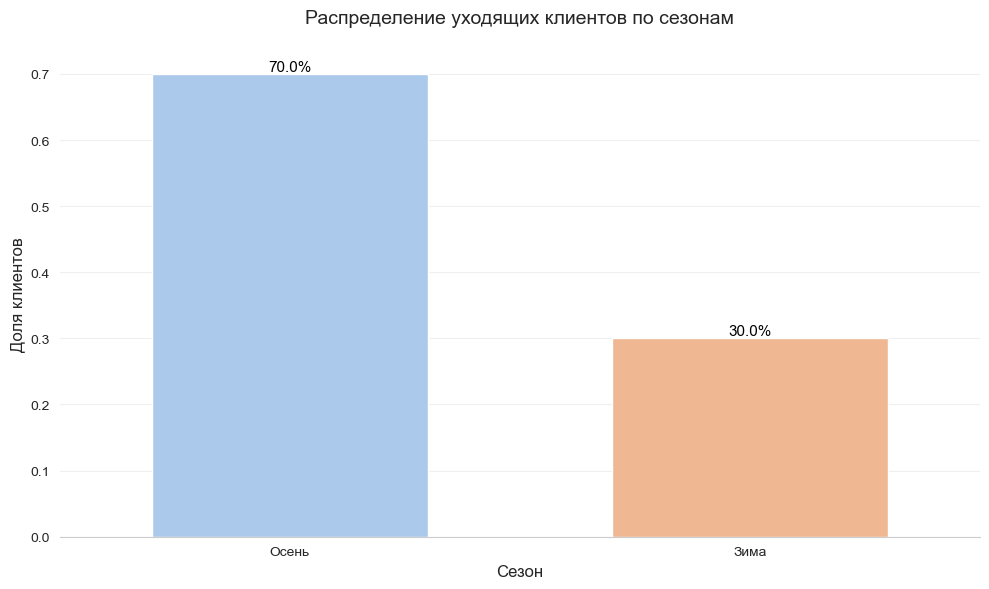

In [112]:
# Устанавливаем стиль
sns.set_style("whitegrid")

# Создаем график
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=season_distribution_outgoing.index,
    y=season_distribution_outgoing.values,
    hue=season_distribution_outgoing.index,  # Явно указываем hue
    palette='pastel',
    dodge=False,
    legend=False,
    width=0.6  # Контролируем ширину столбцов
)

# Добавляем аннотации с процентами
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1%}',  # Форматируем как проценты
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        fontsize=11,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Настраиваем оформление
plt.title('Распределение уходящих клиентов по сезонам', fontsize=14, pad=20)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Доля клиентов', fontsize=12)
plt.xticks(rotation=0)  # Оставляем подписи горизонтальными

# Улучшаем визуализацию
sns.despine(left=True)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Уходящие клиенты покупают чаще всего осенью, а весной и летом покупок нет. Посмотрим какие категории товаров предпочитают уходящие клиенты.

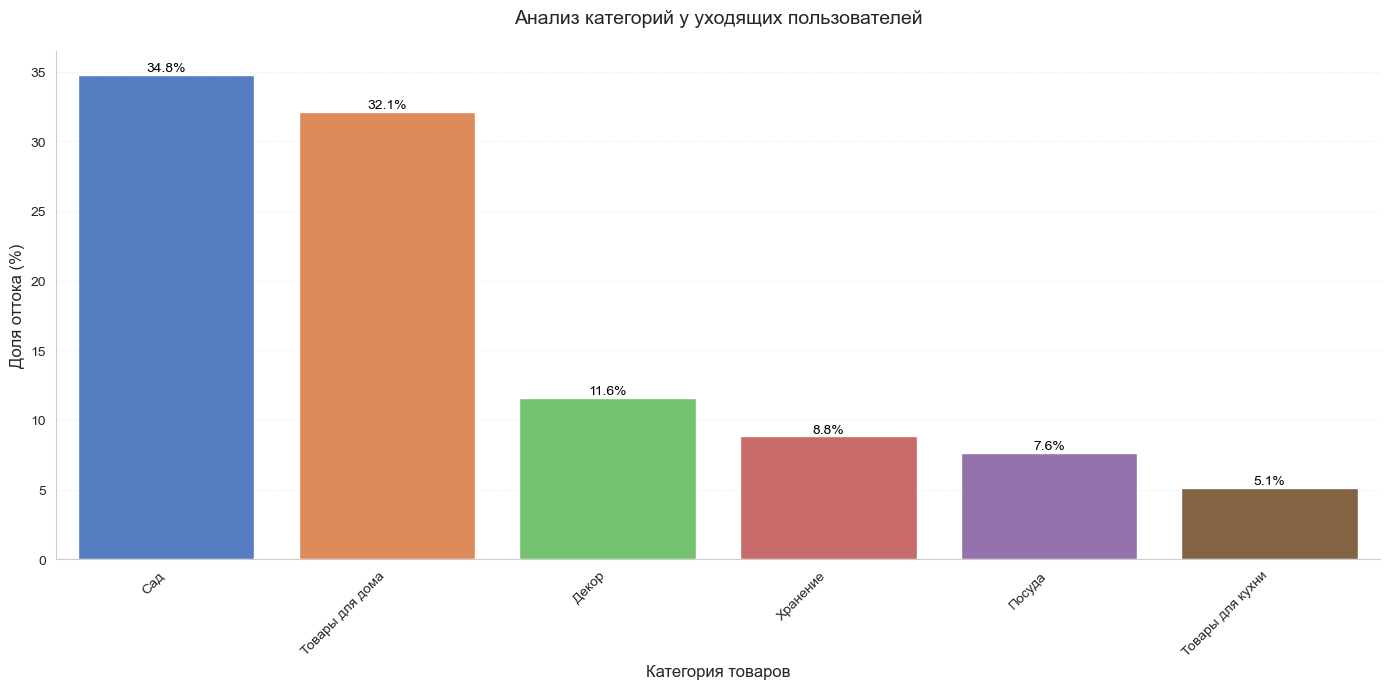

In [113]:
# Рассчитываем доли категорий
category_share_outgoing = outgoing_clients['category'].value_counts(normalize=True) * 100

# Сортируем по убыванию для лучшей наглядности
category_share_outgoing = category_share_outgoing.sort_values(ascending=False)

# Создаем график
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x=category_share_outgoing.index,
    y=category_share_outgoing.values,
    hue=category_share_outgoing.index,  # Явно указываем hue
    palette='muted',
    dodge=False,
    legend=False,
    saturation=0.8  # Контроль насыщенности цветов
)

# Добавляем подписи значений
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Настраиваем оформление
plt.title('Анализ категорий у уходящих пользователей', fontsize=14, pad=20)
plt.xlabel('Категория товаров', fontsize=12)
plt.ylabel('Доля оттока (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Наклон подписей для читаемости

# Улучшаем визуализацию
sns.despine()
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.tight_layout()
plt.show()

Уходящие клиенты одинакого часто делают покупки в категориях "Сад" и "Товары для дома", а вот "Товары для кухни" покупают меньше всего.

Построим график распределения сезонности покупок по категориям. 

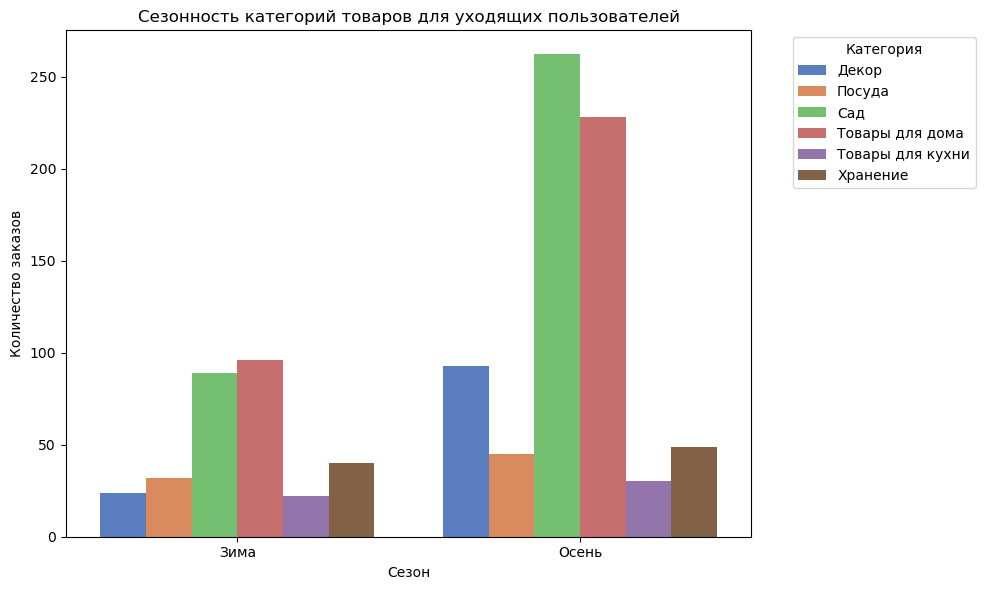

In [98]:
# сгруппируем данные по категориям и сезонам
seasonal_data_outgoing = outgoing_clients.groupby(['category', 'season']).size().reset_index(name='count')

# построим график
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data_outgoing, x='season', y='count', hue='category', palette='muted')

plt.title('Сезонность категорий товаров для уходящих пользователей')
plt.xlabel('Сезон')
plt.ylabel('Количество заказов')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Уходящие пользователи зимой больше всего покупают товары из категории "Товары для дома", на втором месте - "Сад" и меньше всего - "Товары для кухни". Осенью на первое место выходит категория "Сад", а "Товары дл дома" уходят на второе место, "Товары для кухни" также остается самой непопулярной категорией.

**Выводы:** Сегментировали пользователей на основании данных от давности, частоте и сумме покупок. Создали отдельный датафрейм. По итогу исследования выявили три типа клиентов: обычные, потенциальные и уходящие клиенты. Больше половины пользователй у на сзанимают обычные клиенты, на втором месте - потенциальные клиенты и меньше всего уходящих.  Подробная характеристика по каждому сегменту:  

**Обычные клиенты**  
Изучив данные по обычным клиентам, видим что обычные пользователи покупают в среднем на 1270. Есть сильный разброс в стандартном отклонении - значит покупки могут существенно отличаться по сумме. Самая низкая сумма покупки - 22, самая высокая- 15 300. Медианна существенно меньше среднего, значит были покупатели с большими суммами.  

Большая часть обычных покупателей покупает всего один раз. Около 300 клиентов делали покупки дважды и совсем маленький процент с трехкратными покупками.  

Средняя цена прайса для обычных пользователей составляет 409, минимальный прайс - 9, максимальный - 8737. Сегмент "Обычные клиенты" покупают чаще всего весной и меньше всего - зимой.  

Больше половины обычных пользователй предпочитают категорию "Сад", на втором месте - "Товары для дома" и на помледнем - "Товары для кухни".  

Обычные покупатели во все времена года покупают больше всего товаров из категории "Сад", на втором месте категория "Товары для дома". Осенью эти показатели максимально приближены друг к дургу и также осенью самый высокий уровень заказов из категории "Хранение" и "Товары для кухни". 


**Потенциальные клиенты**  
Средняя сумма заказов у потенциальных клиентов составляет 1092. Минимальный заказ - 9, максимальный - 16536. Присутствует разрозненность сумм в заказах.  Потенциальные клиенты чаще всего покупают дважды. По обновленным данным можно сказать, что средний прайс для потенциальных клиентов составляет 944, минимальный - 9, максимальный - 8737. Потенцильные клиенты чаще всего покупают зимой и реже всего осенью.  

Потенциальные пользователи предпочитают товары из категории "Товары для дома", на втором месте категория "Сад" и последнее место занимает категория "Посуда".  

Весной потенциальные покупатели одинакого много покупают товаров из категорий "Сад" и "Товары для дома", зимой на первой место выходят товары из категории "Сад", на втором месте - "Товары для дома". Летом и осенью больше всего покупают товары из категории "Товары для дома", далее идут товары для сада. Самый прибыльный сезон для категорий "Хранение" и "Товары для кухни" - зима.




**Уходящие клиенты**  
Средняя сумма покупки у уходящих пользователей 755, минимальная сумма - 9, максимальная - 11250. В среднем уходящие клиенты заказывали всего один раз. Максимальное число заказов - 3. Средний прайс составляет 497, минимальный - 9, максимальный - 7597.  Уходящие клиенты покупают чаще всего осенью, а весной и летом покупок нет.  Уходящие клиенты одинакого часто делают покупки в категориях "Сад" и "Товары для дома", а вот "Товары для кухни" покупают меньше всего.  

Уходящие пользователи зимой больше всего покупают товары из категории "Товары для дома", на втором месте - "Сад" и меньше всего - "Товары для кухни". Осенью на первое место выходит категория "Сад", а "Товары дл дома" уходят на второе место, "Товары для кухни" также остается самой непопулярной категорией.



## 1.4  Проверка гипотез

**Гипотеза первая:**  

**Н0:** Уходящие клиенты, обычные клиенты и потенциальные не отличаются по среднему чеку.  
**Н1:** Уходящие клиенты, обычные клиенты и потенциальные отличаются по среднему чеку.

In [99]:
# вставила еще раз, потому что иначе код почему-то слетает
import pandas as pd
from scipy import stats  
import matplotlib.pyplot as plt
import seaborn as sns

# рассчитаем средний чек
rfm['avg_order_value'] = rfm['monetary'] / rfm['frequency']

# проверим нормальность распределения среднего чека в каждом сегменте
for segment in rfm['segment'].unique():
    segment_data = rfm.loc[rfm['segment'] == segment, 'avg_order_value']
    stat, p_value = stats.shapiro(segment_data) 
    print(f"Шапиро-Уилк ({segment}): stat={stat:.4f}, p-value={p_value:.4f}")

# подготови  данные по среднему чеку для групп
groups = [rfm.loc[rfm['segment'] == segment, 'avg_order_value'] for segment in rfm['segment'].unique()]

# выберем тест: ANOVA (если нормальность соблюдается) или Краскела-Уоллиса (если нет)
if all(stats.shapiro(group).pvalue > 0.05 for group in groups):  
    f_stat, p_value = stats.f_oneway(*groups)  
    print(f"ANOVA: F-stat={f_stat:.4f}, p-value={p_value:.4f}")
else:
    h_stat, p_value = stats.kruskal(*groups)  # Краскел-Уоллис
    print(f"Краскел-Уоллис: H-stat={h_stat:.4f}, p-value={p_value:.4f}")

# интерпретируем результаты
if p_value < 0.05:
    print('Отклоняем H0: Средние чеки различаются между сегментами.')
else:
    print('Не отклоняем H0: Средние чеки не различаются между сегментами.')

Шапиро-Уилк (Обычные клиенты): stat=0.7822, p-value=0.0000
Шапиро-Уилк (Уходящие клиенты): stat=0.3928, p-value=0.0000
Шапиро-Уилк (Потенциальные клиенты): stat=0.3736, p-value=0.0000
Краскел-Уоллис: H-stat=31.9984, p-value=0.0000
Отклоняем H0: Средние чеки различаются между сегментами.


In [100]:
# если различия есть, проведём попарные сравнения с поправкой Бонферрони
if p_value < 0.05:

    # создадим все возможные комбинации сегментов
    segment_pairs = list(itertools.combinations(rfm['segment'].unique(), 2))
    alpha = 0.05 / len(segment_pairs)  

    for seg1, seg2 in segment_pairs:
        group1 = rfm.loc[rfm['segment'] == seg1, 'avg_order_value']
        group2 = rfm.loc[rfm['segment'] == seg2, 'avg_order_value']
        
        stat, p = stats.mannwhitneyu(group1, group2)  
        print(f"{seg1} vs {seg2}: U-stat={stat:.4f}, p-value={p:.4f}")

        if p < alpha:
            print(f" Значимое различие между {seg1} и {seg2} (p < {alpha:.4f})")
        else:
            print(f" Нет значимых различий между {seg1} и {seg2}")

Обычные клиенты vs Уходящие клиенты: U-stat=280657.0000, p-value=0.0000
 Значимое различие между Обычные клиенты и Уходящие клиенты (p < 0.0167)
Обычные клиенты vs Потенциальные клиенты: U-stat=385434.0000, p-value=0.3669
 Нет значимых различий между Обычные клиенты и Потенциальные клиенты
Уходящие клиенты vs Потенциальные клиенты: U-stat=171782.5000, p-value=0.0001
 Значимое различие между Уходящие клиенты и Потенциальные клиенты (p < 0.0167)


В ходе исследования выяснили, что средние чеки различаются среди сегментов, значит нулевую гипотезу можем отклонить. У обычных и уходящих сегментов есть значимое различие, также как у уходящих и потенциальных клиентов. А вот у обычных и потенциальных клиентов нет значимых различий.

**Гипотеза вторая:**  

**Н0:** Обычные клиенты, потенциальные клиенты и уходящие не отличаются по сумме выручки.  
**Н1:** Обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки.

In [101]:
# ограничим анализ на нужных сегментах
target_segments = ['Обычные клиенты', 'Потенциальные клиенты', 'Уходящие клиенты']
rfm_filtered = rfm[rfm['segment'].isin(target_segments)]

# проерим нормальность распределения суммы выручки в каждом сегменте
for segment in target_segments:
    segment_data = rfm_filtered.loc[rfm_filtered['segment'] == segment, 'monetary']
    stat, p_value = stats.shapiro(segment_data)
    print(f"Шапиро-Уилк ({segment}): stat={stat:.4f}, p-value={p_value:.4f}")

# подготовим данные по выручке для групп
groups = [rfm_filtered.loc[rfm_filtered['segment'] == segment, 'monetary'] for segment in target_segments]

# выберем тест: ANOVA (если нормальность соблюдается) или Крускала-Уоллиса (если нет)
if all(stats.shapiro(group).pvalue > 0.05 for group in groups):
    # если нормальность соблюдается — ANOVA
    f_stat, p_value = stats.f_oneway(*groups)  
    print(f"ANOVA: F-stat={f_stat:.4f}, p-value={p_value:.4f}")
else:
    # если нормальность нарушена — тест Крускала-Уоллиса
    h_stat, p_value = stats.kruskal(*groups)  
    print(f"Крускала-Уоллиса: H-stat={h_stat:.4f}, p-value={p_value:.4f}")

# интерпретируем результаты теста
if p_value < 0.05:
    print('Отклоняем H0: Есть статистически значимые различия в сумме выручки между сегментами.')
else:
    print('Не отклоняем H0: Нет статистически значимых различий в сумме выручки между сегментами.')

Шапиро-Уилк (Обычные клиенты): stat=0.8074, p-value=0.0000
Шапиро-Уилк (Потенциальные клиенты): stat=0.2118, p-value=0.0000
Шапиро-Уилк (Уходящие клиенты): stat=0.2989, p-value=0.0000
Крускала-Уоллиса: H-stat=99.1177, p-value=0.0000
Отклоняем H0: Есть статистически значимые различия в сумме выручки между сегментами.


По данным исследования можем сделать вывод, что обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки, значит нулевую гипотезу отвергаем.

In [102]:
# если различия есть, проведём попарные сравнения с поправкой Бонферрони
if p_value < 0.05:

    # создадим все возможные попарные комбинации сегментов
    segment_pairs = list(itertools.combinations(target_segments, 2))

    # поправка Бонферрони: корректируем уровень значимости
    alpha = 0.05 / len(segment_pairs)  

    for seg1, seg2 in segment_pairs:
        group1 = rfm_filtered.loc[rfm_filtered['segment'] == seg1, 'monetary']
        group2 = rfm_filtered.loc[rfm_filtered['segment'] == seg2, 'monetary']

        # используем тест Манна-Уитни, так как он не требует нормальности
        stat, p = stats.mannwhitneyu(group1, group2)  
        print(f"{seg1} vs {seg2}: U-stat={stat:.4f}, p-value={p:.4f}")

        if p < alpha:
            print(f" Значимое различие между {seg1} и {seg2} (p < {alpha:.4f})")
        else:
            print(f" Нет значимых различий между {seg1} и {seg2}")

Обычные клиенты vs Потенциальные клиенты: U-stat=283734.5000, p-value=0.0000
 Значимое различие между Обычные клиенты и Потенциальные клиенты (p < 0.0167)
Обычные клиенты vs Уходящие клиенты: U-stat=302451.0000, p-value=0.0004
 Значимое различие между Обычные клиенты и Уходящие клиенты (p < 0.0167)
Потенциальные клиенты vs Уходящие клиенты: U-stat=177747.0000, p-value=0.0000
 Значимое различие между Потенциальные клиенты и Уходящие клиенты (p < 0.0167)


Видим, что между всеми сегментами есть значимые различия по сумме выручки.

**Выводы:** в этом разделе проверили две гипотезы:    

Н0: Уходящие клиенты, обычные клиенты и потенциальные не отличаются по среднему чеку.  
Н1: Уходящие клиенты, обычные клиенты и потенциальные отличаются по среднему чеку.  

Н0: Обычные клиенты, потенциальные клиенты и уходящие не отличаются по сумме выручки.  
Н1: Обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки.  

В ходе исследования выяснили, что средние чеки различаются среди сегментов, значит нулевую гипотезу можем отклонить. У обычных и уходящих сегментов есть значимое различие, также как у уходящих и потенциальных клиентов по среднему чеку. А вот у обычных и потенциальных клиентов нет значимых различий.   

По данным исследования второй гипотезы можем сделать вывод, что обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки, значит нулевую гипотезу отвергаем. Между всеми сегментами есть значимые различия по сумме выручки.

## Выводы и рекомендации:

В ходе исследования мы провели следующую работу:  

1. В первой части исследования мы познакомились с данными, выявили дубликаты и пропущенные значения, привели к верному типу данных столбец с датой заказа. Также мы распределили все данные на категории: Сад, Товары для кухни, Хранение, Декор, Посуда, Товары для дома и сделали для них отдельный столбец.  Самой популярной категорией является "Сад", на втором месте - "Товары для дома" и последнее место занимает категория "Товары для кухни".


2. Во второй части нашего исследования мы выявили выбросы в количестве покупок, построили график распределения количества покупок по категориям, выявили лидеров по суммарной выручке от продаж. Им оказалась категория "Товары для дома". Следующим шагом мы построили боксплоты стоимости товаров по категориям, выяснили, что самыми "дорогостоящими" товарами стали товары из категории "Хранение". Также мы рассмотрели сезонность покупок. Видим, что больше всего продаж происходят в осенний и зимний периоды, чуть меньше приходится на весну и на последнем месте - лето. Доля повторных заказов- 31% и самое частое количество покупаемых товаров - 1.  


3. Третьим шагом мы сегментировали пользователей на основании данных от давности, частоте и сумме покупок. Создали отдельный датафрейм. По итогу исследования выявили три типа клиентов: обычные, потенциальные и уходящие клиенты. Больше половины пользователй у на сзанимают обычные клиенты, на втором месте - потенциальные клиенты и меньше всего уходящих.  

Сделали подробную характеристику по каждому сегменту:

**Обычные клиенты**  
Изучив данные по обычным клиентам, видим что обычные пользователи покупают в среднем на 1270. Есть сильный разброс в стандартном отклонении - значит покупки могут существенно отличаться по сумме. Самая низкая сумма покупки - 22, самая высокая- 15 300. Медианна существенно меньше среднего, значит были покупатели с большими суммами.  

Большая часть обычных покупателей покупает всего один раз. Около 300 клиентов делали покупки дважды и совсем маленький процент с трехкратными покупками.  

Средняя цена прайса для обычных пользователей составляет 409, минимальный прайс - 9, максимальный - 8737. Сегмент "Обычные клиенты" покупают чаще всего весной и меньше всего - зимой.  

Больше половины обычных пользователй предпочитают категорию "Сад", на втором месте - "Товары для дома" и на помледнем - "Товары для кухни".  

Обычные покупатели во все времена года покупают больше всего товаров из категории "Сад", на втором месте категория "Товары для дома". Осенью эти показатели максимально приближены друг к дургу и также осенью самый высокий уровень заказов из категории "Хранение" и "Товары для кухни". 


**Потенциальные клиенты**  
Средняя сумма заказов у потенциальных клиентов составляет 1092. Минимальный заказ - 9, максимальный - 16536. Присутствует разрозненность сумм в заказах.  Потенциальные клиенты чаще всего покупают дважды. По обновленным данным можно сказать, что средний прайс для потенциальных клиентов составляет 944, минимальный - 9, максимальный - 8737. Потенцильные клиенты чаще всего покупают зимой и реже всего осенью.  

Потенциальные пользователи предпочитают товары из категории "Товары для дома", на втором месте категория "Сад" и последнее место занимает категория "Посуда".  

Весной потенциальные покупатели одинакого много покупают товаров из категорий "Сад" и "Товары для дома", зимой на первой место выходят товары из категории "Сад", на втором месте - "Товары для дома". Летом и осенью больше всего покупают товары из категории "Товары для дома", далее идут товары для сада. Самый прибыльный сезон для категорий "Хранение" и "Товары для кухни" - зима.


**Уходящие клиенты**  
Средняя сумма покупки у уходящих пользователей 755, минимальная сумма - 9, максимальная - 11250. В среднем уходящие клиенты заказывали всего один раз. Максимальное число заказов - 3. Средний прайс составляет 497, минимальный - 9, максимальный - 7597.  Уходящие клиенты покупают чаще всего осенью, а весной и летом покупок нет.  Уходящие клиенты одинакого часто делают покупки в категориях "Сад" и "Товары для дома", а вот "Товары для кухни" покупают меньше всего.  

Уходящие пользователи зимой больше всего покупают товары из категории "Товары для дома", на втором месте - "Сад" и меньше всего - "Товары для кухни". Осенью на первое место выходит категория "Сад", а "Товары дл дома" уходят на второе место, "Товары для кухни" также остается самой непопулярной категорией.


4. В последнем разделе проверили две гипотезы:  

**Н0:** Уходящие клиенты, обычные клиенты и потенциальные не отличаются по среднему чеку.  
**Н1:** Уходящие клиенты, обычные клиенты и потенциальные отличаются по среднему чеку.  

**Н0:** Обычные клиенты, потенциальные клиенты и уходящие не отличаются по сумме выручки.  
**Н1:** Обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки.  

В ходе исследования выяснили, что средние чеки различаются среди сегментов, значит нулевую гипотезу можем отклонить. У обычных и уходящих сегментов есть значимое различие, также как у уходящих и потенциальных клиентов по среднему чеку. А вот у обычных и потенциальных клиентов нет значимых различий.

По данным исследования второй гипотезы можем сделать вывод, что обычные клиенты, потенциальные клиенты и уходящие отличаются по сумме выручки, значит нулевую гипотезу отвергаем. Между всеми сегментами есть значимые различия по сумме выручки.

**Общие рекомендации**:   

Лидером в категории товаров является "Товары для дома". Их покупают часто, поэтому здесь можно запустить дополнительную рекламу для привлечения еще больших покупателей. Или сделать скидки на некоторые категории, чтобы люди покупали больше. А вот категория "Посуда" стоит на последнем месте. Для больших продаж можно сделать акцию, например "1+1 = 3".  


**Рекомендации по каждому виду сегмента:**  

ОБЫЧНЫЕ ПОЛЬЗОВАТЕЛИ  

Категория "Сад": можно увеличить рекламную активность весной, так как это пиковый сезон для обычных клиентов. Предложим товары из категории "Сад". Зимой предложим специальные акции или скидки на товары для дома, чтобы стимулировать покупки.  Так как "Сад"  самая популярная категория, регулярно предлагаем новые товары из этой категории, особенно весной и летом.  

Категория "Товары для дома": увеличим рекламу этой категории, особенно в осенне-зимний период, когда люди чаще занимаются обустройством дома.  

Категория "Товары для кухни": Хотя это наименее популярная категория, попробуйте предложить уникальные или сезонные товары (например, кухонные гаджеты для праздников).  

Что еще можно предложить: скидки на товары из популярных категорий ("Сад" и "Товары для дома") для стимулирования покупок, программы "Купи больше — сэкономь больше" (например, скидка на второй товар или бесплатная доставка при покупке на определенную сумму),также можно предлагать сопутствующие товары. Например, если клиент купил садовый инвентарь, предложим ему удобрения или семена.  

Для того, чтобы увеличить возвращаемость клиентов можно внедрить программу лояльности (бонусы, накопительные бонусы, скидки). Второй вариант - это персонализированные рассылки на основе покупок клиентов. 

В весенний период можно рассказывать о новых поступлениях в популярных категориях товаров. Осенью и зимой о тех товарах, которые будут актуальны в это время года. 

Так как категория "Сад" явлется актуальной во все времена года, для нее стоит усилить продвижение (сезонные акции и скидки).Также стоит уделить внимание второй по популярности категории "Товары для дома". Ее тоже стоит активно продвигать, особенно в периоды низкого спроса. Можно создавать привлекающие сезонные подборки (например, "Как сделать осенью уютный дом" или "Украшаем дом на Новый год"). Осенью видим повышенный спрос на категории "Хранение" и "Товары для кухни". Это значит можно сделать акцент на этих категориях: предложить скидки, запустить рассылку, создать тематические подборки.    

ПОТЕНЦИАЛЬНЫЕ КЛИЕНТЫ  


Пиковым сезоном является зима, значит можно увеличить рекламную активность, предлагаем аткже товары из популярных категорий. Осенью таке стоит не забывать про рекламу. 

Категория "Сад": увеличим рекламу этой категории весной и летом, предлагая сезонные товары.  Зимой эта категория лидирует, поэтому можем предложить дополниетльные скидки и акции.

Категория "Товары для дома": это самая популярная категория, потому регулярно предлагаем новые товары из этой категории, особенно летом и осенью. Можно првести езонные акции, подготовить подборки товаров. Зимой эта категория также остается прибыльной, так что рекомендации подойдут и для зимнего периода.  

Весной потенциальные покупатели активно интересуются товарами для сада и дома, поэтому стоит усилить продвижение этих категорий, напрмиер, провести распродажу, создать тематические подборки.

Категория "Посуда": это самая непопулярная категория, но мы можем предложить уникальные предложения в преддверии праздников (подарочные наборы посуды,например).  

Предложим скидки на товары из популярных категорий ("Товары для дома" и "Сад") для стимулирования покупок. Также можем использовать и рекомендации по  бонусной или программе лояльности, рассылке сопутствующих товаров и сделать упор на сезонные рассылки популярных товаров.  

УХОДЯЩИЕ КЛИЕНТЫ  

Для уходящих клиентов стоит подумать над более интересными и необычными подходами, так как нам важно перевести их в конечном итоге в обычных покупателей. Увеличим рекламную активность осенью, так как это пиковый сезон для уходящих клиентов. Предложим товары из категорий "Сад" и "Товары для дома".  

Весной и летом активность низкая, можем предложить специальные акции или скидки на товары для сада и дома, чтобы стимулировать покупки в эти сезоны.  

Категория "Сад и Товары для дома:" также регулярно предлагаем новые товары из этих категорий (они являются самыми популярными), особенно осенью.  Чаще всего категория клиенты покупают "Товары для дома" зимой, поэтому здесь можно провести распродажу, предложить акции и тематические подборки. 

Категория "Сад" пользуется большим спросом осенью, значит маркетинговые усилия стоит увеличить в этот период: скидки, бонусы, рассылки будут хорошим плюсом. 

Категория "Товары для кухни:" также, несмотря на низкую популярность, может предлагать "праздничные" наборы и подарки.  Она является самой непопулярной, поэтому ее можно продвигать через специальные завлдекающие мероприятия: акция на товары, особые подборки, описывающие уют, красоту и удобство, чтобы клиенты захотели их купить. Можно попробовать продвигать эти товары через подборку к популярным категориям. 

Для уходящих пользователей нам важно дать стимуляцию на поторные покупки. Что можем предложить: персонализированную рассылку после покупки (сопутствующие товары или скидку на следующий заказ/бесплатную доставку), внедряем программу лояльности. 

Вторым моментом важно увеличить средний чек: предлагаем скидки на товары из популярных категорий ("Сад" и "Товары для дома"), внедряем систему рекоемндаций. 

*Полезным будет сбор отзывов и предложений клиентов: что им нравится, а что можно улучшить. Для повышения вовлеченности клиентов можно сделать блог или иной образовательный ресурс, где можно рассказывать о новинках, как использовать товары и др.*